In [1]:
# -------------------------------------------------------------------------------------------------------------------
# Course name - Exploratory data analysis
# Course code - DSC530
# Week 12 assignment
# Script name - Shekhar530Week12.ipynb
# Creator - Manish Shekhar
# Date created - Jan 1st 2023
# -------------------------------------------------------------------------------------------------------------------

## Description of the data set
#### This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data is continuously being collected from February 2016, using several data providers, including multiple APIs that provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 2.8 million accident records in this dataset.

## Metadata of columns

#### 1. Severity (Type : Number) - Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

#### 2. Start_Time (Type : Date Time) - Shows start time of the accident in local time zone.

#### 3. End_Time (Type : Date Time) - Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.

#### 4. Start_Lat (Type : Number) - Shows latitude in GPS coordinate of the start point.

#### 5. Start_Lng (Type : Number) - Shows longitude in GPS coordinate of the start point.

#### 6. End_Lat (Type : Number) - Shows latitude in GPS coordinate of the end point.

#### 7. End_Lng (Type : Number) - Shows longitude in GPS coordinate of the end point.

#### 8. Distance(mi) (Type : Number) - The length of the road extent affected by the accident.

#### 9. Description (Type : String) - Shows a human provided description of the accident.

#### 10. Number (Type : Number) - Shows the street number in address field.

#### 11. Street (Type : String) - Shows the street name in address field.

#### 12. Side (Type : String) - Shows the relative side of the street (Right/Left) in address field.

#### 13. City (Type : String) - Shows the city name in address field.

#### 14. County (Type : String) - Shows the county name in address field.

#### 15. State (Type : String) - Shows the state name in address field.

#### 16. Zipcode (Type : String) - Shows the 5 digit zipcode in address field.

#### 17. Country (Type : String) - Shows the country name in address field. Data is for US only.

#### 18. Timezone (Type: String) - Shows timezone based on the location of the accident (eastern, central, etc.).

#### 19. Airport_Code (Type : String) - Denotes an airport-based weather station which is the closest one to location of the accident.

#### 20. Weather_Timestamp (Type : Date) - Shows the time-stamp of weather observation record (in local time).

#### 21. Temperature (F) (Type : Number) - Shows the temperature (in Fahrenheit).

#### 22. Wind_Chill (F) (Type : Number) - Shows the wind chill (in Fahrenheit).

#### 23. Humidity(%) (Type : Number) - Shows the humidity (in percentage).

#### 24. Pressure(in) (Type : Number) - Shows the air pressure (in inches).

#### 25. Visibility(miles) (Type : Number) - Shows visibility (in miles).

#### 26. Wind_Direction (Type : String) - Shows wind direction.

#### 27. Wind_Speed (Type : Number) - Shows wind speed (in miles per hour).

#### 28. Precipitation(in) (Type : Number) - Shows precipitation amount in inches, if there is any.

#### 29. Weather_Condition (Type : String) - Shows the weather condition (rain, snow, thunderstorm, fog, etc.)

#### 30. Amenity (Type : Boolean) - A POI annotation which indicates presence of amenity in a nearby location.

#### 31. Bump (Type : Boolean) - A POI annotation which indicates presence of speed bump or hump in a nearby location.

#### 32. Crossing (Type : Boolean) - A POI annotation which indicates presence of crossing in a nearby location.

#### 33. Give_Way (Type : Boolean) - A POI annotation which indicates presence of give_way in a nearby location.

#### 34. Junction (Type : Boolean) - A POI annotation which indicates presence of junction in a nearby location.

#### 35. No_Exit (Type : Boolean) - A POI annotation which indicates presence of no exit in a nearby location.

#### 36. Railway (Type : Boolean) - A POI annotation which indicates presence of railway in a nearby location.

#### 37. Roundabout (Type : Boolean) - A POI annotation which indicates presence of round about in a nearby location.

#### 38. Station (Type : Boolean) - A POI annotation which indicates presence of station in a nearby location.

#### 39. Stop (Type : Boolean) - A POI annotation which indicates presence of stop in a nearby location.

#### 40. Traffic_Calming (Type : Boolean) - A POI annotation which indicates presence of traffic calming in a nearby location.

#### 41. Traffic_Signal (Type : Boolean) - A POI annotation which indicates presence of Traffic Signal in a nearby location.

#### 42. Traffic_Loop (Type : Boolean) - A POI annotation which indicates presence of Traffic Loop in a nearby location.

#### 43. Sunrise_Sunset (Type : String) - Shows the period of day (i.e. day or night) based on sunrise/sunset.

#### 44. Civil_Twilight (Type : String) - Shows the period of day (i.e. day or night) based on civil twilight.

#### 45. Nautical_Twilight (Type : String) - Shows the period of day (i.e. day or night) based on nautical twilight.

#### 46. Astronomical_Twilight (Type : String) - Shows the period of day (i.e. day or night) based on astronomical twilight.

## Possible applications of the dataset

#### US-Accidents can be used for numerous applications such as real-time accident prediction, studying accident hotspot locations, casualty analysis and extracting cause and effect rules to predict accidents, or studying the impact of precipitation or other environmental stimuli on accident occurrence.

## STEP 1 - Reading the data file

In [4]:
# [Manish] - Importing required libraries
import sys
import numpy as np
import thinkstats2
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics
import thinkplot
import pandas as pd
import scipy
import pandas_profiling as pp
import plotly.express as px
from prophet import Prophet
import datetime
import statsmodels.formula.api as smf
import opendatasets as od

In [3]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [2]:
KAGGLE_USERNAME="manishshekhar"
KAGGLE_KEY="d550fc7b6f0060440a22a18b2df4a3c3"

In [5]:
# Downloading the data file from Kaggle
kaggle_data = od.download("https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?select=US_Accidents_Dec21_updated.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  manishshekhar


Your Kaggle Key:

  ········


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 269M/269M [00:17<00:00, 16.0MB/s]


In [118]:
# Reading the data file into the pandas data frame
df = pd.read_csv('us-accidents/US_Accidents_Dec21_updated.csv')
df.head()

# Use the code below if placing the data file in your pwd / present working directory
# df = pd.read_csv('US_Accidents_Dec21_updated.csv')

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1  3         2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2  2         2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3  2         2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4  2         2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5  3         2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870  3.230          
1 -84.062800  39.865010 -84.048730  0.747          
2 -84.524680  39.102090 -84.523960  0.055          
3 -81.537840  41.062170 -81.535470  0.123          
4 -84.492792  39.170476 -84.501798  0.500          

                                                                  Description  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentangy Riv Rd/Exit 22 - Accident.   
1  At OH-4/OH-235/Exit 41 - Accident.                                           
2  At I-71/US-50/Exit 1 - Accident.                                             
3  At Dart Ave/Exit 21 - Accident.                                              
4  At Mitchell Ave/Exit 6 - Accident.                                           

   Number       Street Side        City      County State Zipcode Country  \
0 NaN      Outerbelt E  R    Dublin      Franklin    OH    43017   US       
1 NaN      I-70 E       R    Dayton      Montgomery  OH    45424   US       
2 NaN      I-75 S       R    Cincinnati  Hamilton    OH    45203   US       
3 NaN      I-77 N       R    Akron       Summit      OH    44311   US       
4 NaN      I-75 S       R    Cincinnati  Hamilton    OH    45217   US       

     Timezone Airport_Code    Weather_Timestamp  Temperature(F)  \
0  US/Eastern  KOSU         2016-02-08 00:53:00  42.1             
1  US/Eastern  KFFO         2016-02-08 05:58:00  36.9             
2  US/Eastern  KLUK         2016-02-08 05:53:00  36.0             
3  US/Eastern  KAKR         2016-02-08 06:54:00  39.0             
4  US/Eastern  KLUK         2016-02-08 07:53:00  37.0             

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
0  36.1           58.0         29.76         10.0            SW              
1 NaN             91.0         29.68         10.0            Calm            
2 NaN             97.0         29.70         10.0            Calm            
3 NaN             55.0         29.65         10.0            Calm            
4  29.8           93.0         29.69         10.0            WSW             

   Wind_Speed(mph)  Precipitation(in) Weather_Condition  Amenity   Bump  \
0  10.4             0.00               Light Rain        False    False   
1 NaN               0.02               Light Rain        False    False   
2 NaN               0.02               Overcast          False    False   
3 NaN              NaN                 Overcast          False    False   
4  10.4             0.01               Light Rain        False    False   

   Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  \
0  False     False     False     False    False    False       False    False   
1  False     False     False     False    False    False       False    False   
2  False     False     True      False    False    False       False    False   
3  False     False     False     False    False    False       False    False   
4  False     False     False     False    False    False       False    False   

   Traffic_Calming  Traffic_Signal  Turning_Loop Sunrise_Sunset  \
0  False            False           False         Night           
1  False            False           False         Night           
2  False            False           False         Night           
3  False            False           False         Night           
4  False            False           False         Day             

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0  Night          Night       

In [7]:
# Checking the columns and check if file was read appropriately. Do we have all 47 columns?
df.info()
# There are 47 columns, data types seems correct as well

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [8]:
# Checking data
pd.set_option('display.max_columns',None)
df.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
4  A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -81.537840  41.062170 -81.535470         0.123   
4 -84.492792  39.170476 -84.501798         0.500   

                                         Description  Number       Street  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...     NaN  Outerbelt E   
1                 At OH-4/OH-235/Exit 41 - Accident.     NaN       I-70 E   
2                   At I-71/US-50/Exit 1 - Accident.     NaN       I-75 S   
3                    At Dart Ave/Exit 21 - Accident.     NaN       I-77 N   
4                 At Mitchell Ave/Exit 6 - Accident.     NaN       I-75 S   

  Side        City      County State Zipcode Country    Timezone Airport_Code  \
0    R      Dublin    Franklin    OH   43017      US  US/Eastern         KOSU   
1    R      Dayton  Montgomery    OH   45424      US  US/Eastern         KFFO   
2    R  Cincinnati    Hamilton    OH   45203      US  US/Eastern         KLUK   
3    R       Akron      Summit    OH   44311      US  US/Eastern         KAKR   
4    R  Cincinnati    Hamilton    OH   45217      US  US/Eastern         KLUK   

     Weather_Timestamp  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
0  2016-02-08 00:53:00            42.1           36.1         58.0   
1  2016-02-08 05:58:00            36.9            NaN         91.0   
2  2016-02-08 05:53:00            36.0            NaN         97.0   
3  2016-02-08 06:54:00            39.0            NaN         55.0   
4  2016-02-08 07:53:00            37.0           29.8         93.0   

   Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  \
0         29.76            10.0             SW             10.4   
1         29.68            10.0           Calm              NaN   
2         29.70            10.0           Calm              NaN   
3         29.65            10.0           Calm              NaN   
4         29.69            10.0            WSW             10.4   

   Precipitation(in) Weather_Condition  Amenity   Bump  Crossing  Give_Way  \
0               0.00        Light Rain    False  False     False     False   
1               0.02        Light Rain    False  False     False     False   
2               0.02          Overcast    False  False     False     False   
3                NaN          Overcast    False  False     False     False   
4               0.01        Light Rain    False  False     False     False   

   Junction  No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  \
0     False    False    False       False    False  False            False   
1     False    False    False       False    False  False            False   
2      True    False    False       False    False  False            False   
3     False    False    False       False    False  False            False   
4     False    False    False       False    False  False            False   

   Traffic_Signal  Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False         False          Night          Night   
1           False         False          Night          Night   
2           False         False          Night          Night   
3           False         False          Night          Night   
4           False         False            Day            Day   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  
1             Night                 Night  
2             Nig

## Step 2 - Profiling data and understanding summary stats

In [9]:
# Using describe to see the summary stats of all columns in the dataset
df.describe(include='all')
# Parameter of the describe function is set to “all” which forces pandas to include all the data types 
# of the dataset to be included in the summary. 
# The string type values are accompanied by options such as unique, top, and frequency

ID      Severity           Start_Time             End_Time  \
count   2845342  2.845342e+06              2845342              2845342   
unique  2845342           NaN              1959333              2351505   
top         A-1           NaN  2021-01-26 16:16:13  2021-11-22 08:00:00   
freq          1           NaN                  214                   88   
mean        NaN  2.137572e+00                  NaN                  NaN   
std         NaN  4.787216e-01                  NaN                  NaN   
min         NaN  1.000000e+00                  NaN                  NaN   
25%         NaN  2.000000e+00                  NaN                  NaN   
50%         NaN  2.000000e+00                  NaN                  NaN   
75%         NaN  2.000000e+00                  NaN                  NaN   
max         NaN  4.000000e+00                  NaN                  NaN   

           Start_Lat     Start_Lng       End_Lat       End_Lng  Distance(mi)  \
count   2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    3.624520e+01 -9.711463e+01  3.624532e+01 -9.711439e+01  7.026779e-01   
std     5.363797e+00  1.831782e+01  5.363873e+00  1.831763e+01  1.560361e+00   
min     2.456603e+01 -1.245481e+02  2.456601e+01 -1.245457e+02  0.000000e+00   
25%     3.344517e+01 -1.180331e+02  3.344628e+01 -1.180333e+02  5.200000e-02   
50%     3.609861e+01 -9.241808e+01  3.609799e+01 -9.241772e+01  2.440000e-01   
75%     4.016024e+01 -8.037243e+01  4.016105e+01 -8.037338e+01  7.640000e-01   
max     4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01  1.551860e+02   

                                              Description        Number  \
count                                             2845342  1.101431e+06   
unique                                            1174563           NaN   
top     A crash has occurred causing no to minimum del...           NaN   
freq                                                 7978           NaN   
mean                                                  NaN  8.089408e+03   
std                                                   NaN  1.836009e+04   
min                                                   NaN  0.000000e+00   
25%                                                   NaN  1.270000e+03   
50%                                                   NaN  4.007000e+03   
75%                                                   NaN  9.567000e+03   
max                                                   NaN  9.999997e+06   

         Street     Side     City       County    State  Zipcode  Country  \
count   2845340  2845342  2845205      2845342  2845342  2844023  2845342   
unique   159651        3    11681         1707       49   363085        1   
top      I-95 N        R    Miami  Los Angeles       CA    91761       US   
freq      39853  2353309   106966       234122   795868     6162  2845342   
mean        NaN      NaN      NaN          NaN      NaN      NaN      NaN   
std         NaN      NaN      NaN          NaN      NaN      NaN      NaN   
min         NaN      NaN      NaN          NaN      NaN      NaN      NaN   
25%         NaN      NaN      NaN          NaN      NaN      NaN      NaN   
50%         NaN      NaN      NaN          NaN      NaN      NaN      NaN   
75%         NaN      NaN      NaN          NaN      NaN      NaN      NaN   
max         NaN      NaN      NaN          NaN      NaN      NaN      NaN   

          Timezone Airport_Code    Weather_Timestamp  Temperature(F)  \
count      2841683      2835793              2794606    2.776068e+06   
unique           4         2004               474214             NaN   
top     US/Eastern         KCQT  2021-12-17 14:53:00             NaN   
freq       1221927        52790      

In [211]:
##### Observations - Looking at summary stats
# 1. Severity of majority of accidents are medium as mean is about 2.13 (right in the middle of 1-low and 4-high). 75th percentitle for severity is also about 2.

# 2. Most accidents seems to have affected about 7.02 miles with 75th percentile at 7.64 miles. 
# We do have max at 15.51 miles. We can further plot to detect outliers. 
# We do have cases which did not affect any distance at all. We may want to tag such cases.

# 3. Mean temperature when most accidents happen seems to be 61.79 defree F with 75th percentile at 76 degree F. 
# Max temperature is marked as 196 degrees which seems incorrect data and will need some treatment.

# 4. Mean humidity is about 64% while 75th percentile is at 83%. Max listed as 100% humidity. 
# I am not sure if thats possible. It could be an outlier and that may need treatment.

# 5. Mean visibility is about 9 miles which seems pretty normal conditions for most accidents.

# 6. Mean precipitation is about 0.007 inches. 
# Maximum for certain cases is 24 inches which sounds pretty extreme for driving.

# 7. Most accidents seems to have taken place in day time

# 8. Most accidents seem sto to have less influence from presence of 
# bump, crossing, give away, junction, no exit, railway, roundabout, station, stop, traffic calming, traffic signal
# traffic_loop etc



# First four questions from the project requirements
1. A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

2. Describe what the 5 variables mean in the dataset (Chapter 1).

3. Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

4. Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).

### Below are the numerical variables I am selecting / deriving to explore the US accidents data from different dimensions

In [212]:
# 1. Severity (Present in the data set) - Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact 
# on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).


# 2. Time duration (Derived) - This is derived field and is differnce between start time and end time of the accident reported.
# It also represents the total time it took from start of the accident report till the traffic cleared and accident is marked ended.

# 3. Distance (Present in the dataset) - The length of the road extent in miles affected by the accident.

# 4. Temperature (Present in the dataset) - Shows the temperature (in Fahrenheit) at the time of the accident.

# 5. Wind_Speed (Present in the dataset) - Shows wind speed (in miles per hour) at the time of an accident.

# 6. Precipitation (Present in the dataset) - Shows precipitation amount in inches, if there is any.

In [10]:
# Deriving buckets of traffic events
df['traffic_event_type'] = np.where(
     df['Description'].str.contains("Accident|accident|crash|Crash")==True, 
    'Accident', 
     np.where(
        df['Description'].str.contains("Incident|incident")==True, 'Incident', 'Cautionary events'
     )
)

df['traffic_event_type'].value_counts()

Accident             1889425
Incident              856251
Cautionary events      99666
Name: traffic_event_type, dtype: int64

In [11]:
# Utilize accident data frame for further analysis. 
# DATA CLEAN UP 1 - Clean up data to have start and end date times as datetime data types
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

In [12]:
# Create a data frame only of accidents
df_accident = df[df['traffic_event_type']=='Accident']
df_accident['traffic_event_type'].value_counts()

Accident    1889425
Name: traffic_event_type, dtype: int64

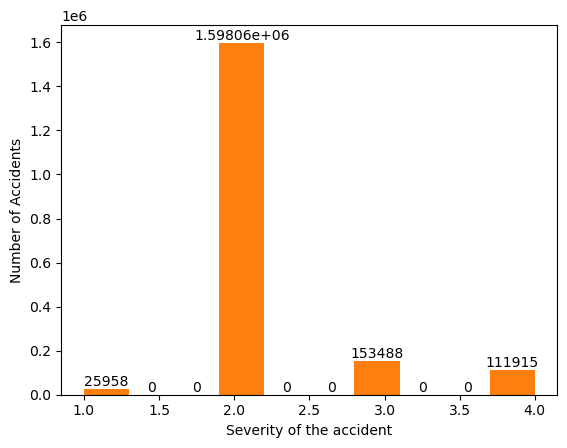

In [13]:
# Plotting histograms of the chosen numeric variables 
# 1. Severity

plt.hist(df_accident['Severity'].dropna(), bins=10)
plt.xlabel('Severity of the accident')
plt.ylabel('Number of Accidents')

counts, edges, bars = plt.hist(df_accident['Severity'])
plt.bar_label(bars)
plt.show()

# Observation - 
# 1. Severity of majority of accidents are medium as mean is about 2.13 (right in the middle of 1-low and 4-high). 
# 75th percentitle for severity is also about 2.
# About 85% of the accidents are of medium priority looking at the histogarm below.

In [102]:
import warnings
warnings.filterwarnings("ignore")

# Plotting histograms of the chosen numeric variables 
# 2. Time duration (Derived)
df_accident['hours_diff'] = (df_accident.End_Time - df_accident.Start_Time) / pd.Timedelta(hours=1)
df_accident['mins_diff'] = (df_accident.End_Time - df_accident.Start_Time) / pd.Timedelta(minutes=1)

df_accident.loc[:,['Start_Time', 'End_Time', 'hours_diff']]
df_accident['hours_diff'].describe()

count    1.889425e+06
mean     4.154990e+00
std      8.637077e+01
min      3.333333e-02
25%      6.311111e-01
50%      2.083889e+00
75%      6.000000e+00
max      2.546689e+04
Name: hours_diff, dtype: float64

In [16]:
# Looking at above stats it seems we have outliers as 75 percent of the times traffic was cleared within 6 hrs.
# Checking count of accidents that took more than 17 hrs to clear
df_accident[df_accident['hours_diff'] > 60].ID.count()

# It may be a good idea to see distribution in accidents which cleared in <= 60 hrs and accidents which cleared in > 60 hrs separately
# Let's create two separate datasets
df_accident_less_60hr=df_accident[df_accident['hours_diff'] <= 60]
df_accident_more_60hr=df_accident[df_accident['hours_diff'] > 60]


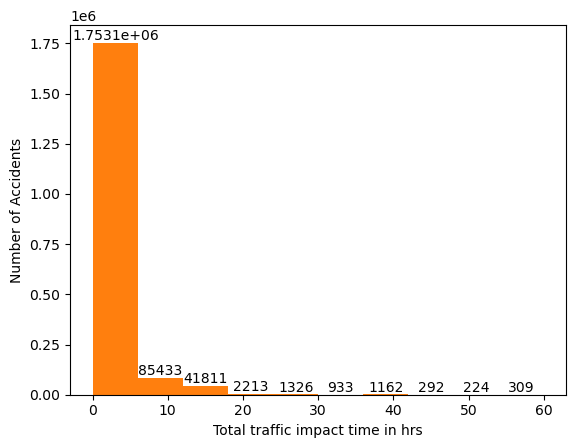

In [17]:
# Check distribution of accidents that impacted traffic for <= 60 hrs
plt.hist(df_accident_less_60hr['hours_diff'].dropna(), bins=30)
plt.xlabel('Total traffic impact time in hrs')
plt.ylabel('Number of Accidents')

counts, edges, bars = plt.hist(df_accident_less_60hr['hours_diff'])
plt.bar_label(bars)
plt.show()

# Observation - 
# 1. Most accidents got cleared in less than 7 hrs and thus distribution is left skewed with long right tail i.e. there are a few 
# accidents that took a lot of time to clear (> 7hrs to clear)

In [18]:
df_accident_more_60hr['hours_diff'].describe()

count     2619.000000
mean       748.724670
std       2195.478343
min         60.035556
25%         75.994722
50%         95.995278
75%        249.075139
max      25466.889444
Name: hours_diff, dtype: float64

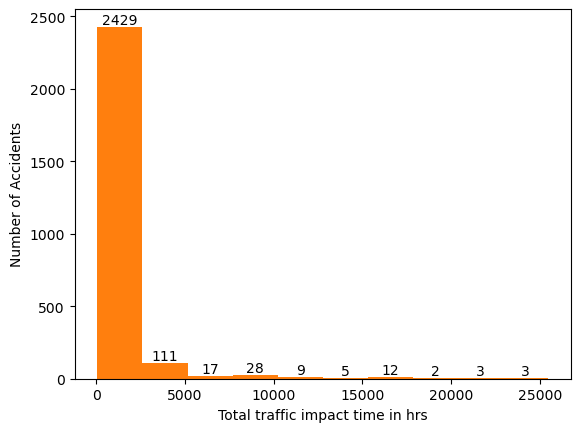

In [19]:
# Check distribution of accidents that impacted traffic for > 60 hrs
# We can see about 50% of accidents that took more than 60 hrs to get cleared where cleared in about 95 hrs.
# There are comparatively very few accident cases that took more than 100 hrs and thus they appear to be cases of incorrect recording
# or outliers. It would be safe to concentrate on accidents cases that took less than 100 hrs to clear and thus discarding outliers.

plt.hist(df_accident_more_60hr['hours_diff'].dropna(), bins=20)
plt.xlabel('Total traffic impact time in hrs')
plt.ylabel('Number of Accidents')

counts, edges, bars = plt.hist(df_accident_more_60hr['hours_diff'])
plt.bar_label(bars)
plt.show()



In [20]:
# Lets review details of some accidents that took more than 100 hrs to clear to see what they are
pd.set_option('display.max_colwidth', 0)
df_accident_more_60hr[df_accident_more_60hr['hours_diff'] >  100].loc[:,['hours_diff', 'traffic_event_type', 'Description']]

hours_diff traffic_event_type  \
4401     2194.763056   Accident            
4402     2194.763056   Accident            
6027     10521.945556  Accident            
8198     612.066389    Accident            
13077    236.109167    Accident            
...             ...         ...            
2841509  1921.354167   Accident            
2842031  1909.123889   Accident            
2843751  255.657500    Accident            
2843752  296.311111    Accident            
2844725  104.620556    Accident            

                                                                                             Description  
4401     Between Wooden Valley Rd and CA-128/Capell Valley Rd - Accident. Single alternate lane traffic.  
4402     Between CA-128/Capell Valley Rd and Wooden Valley Rd - Accident. Single alternate lane traffic.  
6027     Closed between Willow St and I St - Road closed due to accident. Construction work.              
8198     Closed between CA-138/Antelope Hwy and 263rd St E - Road closed due to accident. Roadwork.       
13077    Between IA-12/Exit 147B and I-129/US-75/US-20/Exit 144 - Accident. Lane closed.                  
...                                                                                  ...                  
2841509  Closed at I-80 - Road closed due to accident. Roadwork.                                          
2842031  Closed at I-80 - Road closed due to accident. Roadwork.                                          
2843751  At US-30/Exit 213 - Accident.                                                                    
2843752  At US-30/Exit 213 - Accident.                                                                    
2844725  At Spring Creek Rd/Exit 248 - Accident.                                                          

[1230 rows x 3 columns]

#### Observation (Accidents & road work / lane restriction) - It seems of the accidents that took more than 100 hrs to be cleared involves "road work" as well i.e. either "road work" is caused because of accident or accident happened in the area where "road work" was in progress.

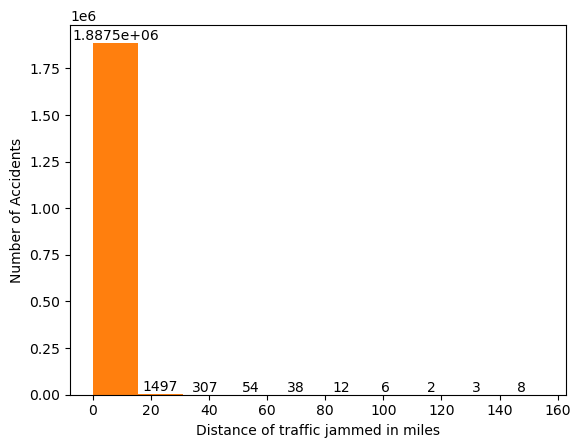

In [21]:
# Plotting histograms of the chosen numeric variables 
# 3. Distance (in miles - present in the data set)

plt.hist(df_accident['Distance(mi)'].dropna(), bins=10)
plt.xlabel('Distance of traffic jammed in miles')
plt.ylabel('Number of Accidents')

counts, edges, bars = plt.hist(df_accident['Distance(mi)'])
plt.bar_label(bars)
plt.show()



In [22]:
df_accident['Distance(mi)'].describe()

count    1.889425e+06
mean     7.701591e-01
std      1.605361e+00
min      0.000000e+00
25%      4.700000e-02
50%      2.990000e-01
75%      8.320000e-01
max      1.551860e+02
Name: Distance(mi), dtype: float64

In [23]:
df_accident[df_accident['Distance(mi)'] > 10].ID.count()
# df_accident[df_accident['Distance(mi)'] <= 10].ID.count()

5884

In [24]:
# Check smallest 10 and largest 10 values using hist's smallest and largest
hist = thinkstats2.Hist(df_accident['Distance(mi)'], label='Distance')
for distance, freq in hist.Smallest(10):
    print(distance, freq)

# We can clearly see that majority of accidents impacted less that 1 mile of traffic
# Let's check the distribution of accidents that impacted more than 1 mile of traffic. Let's also see description on them to get into specifics
# Any accident that impacted more than 1 mile again could be related to "road block" or "traffic lanes closure".

0.0 379231
0.001 4863
0.002 2438
0.003 2474
0.004 2680
0.005 2220
0.006 2353
0.0069999999999999 2315
0.008 2569
0.009 2274


In [25]:
# Creating another dataset with Distance(mi) > 10 mile
df_accident_more_dist = df_accident[df_accident['Distance(mi)'] > 10]
df_accident_more_dist['Distance(mi)'].value_counts()

# There are only about 6K accident cases that impacted traffic more than 10 miles

11.019    71
10.254    34
10.720    34
21.641    22
13.550    17
          ..
13.138    1 
10.068    1 
10.018    1 
10.680    1 
16.051    1 
Name: Distance(mi), Length: 3513, dtype: int64

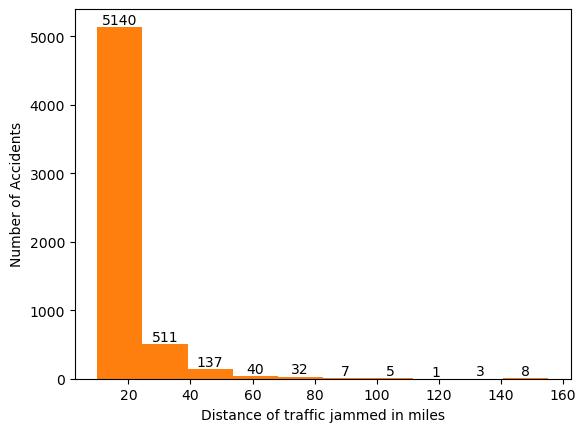

In [26]:
# See the distrbution using histogram
plt.hist(df_accident_more_dist['Distance(mi)'].dropna(), bins=10)
plt.xlabel('Distance of traffic jammed in miles')
plt.ylabel('Number of Accidents')

counts, edges, bars = plt.hist(df_accident_more_dist['Distance(mi)'])
plt.bar_label(bars)
plt.show()

In [27]:
# Lets review details of some accidents that impacted more than 10 miles of distance
pd.set_option('display.max_colwidth', 0)
df_accident_more_dist.loc[:,['Distance(mi)', 'traffic_event_type', 'Description']]

Distance(mi) traffic_event_type  \
81       11.638        Accident            
139      10.598        Accident            
141      10.598        Accident            
142      10.366        Accident            
144      150.138       Accident            
...          ...            ...            
2843536  13.443        Accident            
2843537  13.443        Accident            
2844553  11.185        Accident            
2844997  36.350        Accident            
2845058  16.051        Accident            

                                                                                           Description  
81       Closed between Indiana/Ohio State Line and I-69/US-27/Exit 144 - Road closed due to accident.  
139      Closed between US-35/IN-28/Exit 45 and IN-26/Exit 55 - Road closed due to accident.            
141      Closed between US-35/IN-28/Exit 45 and IN-26/Exit 55 - Road closed due to accident.            
142      Closed between IN-26/Exit 55 and US-35/IN-28/Exit 45 - Road closed due to accident.            
144      Between I-71/US-50/Exit 1 and 8 Mile Rd/Exit 59 - Accident. in the left lane.                  
...                                                                                ...                  
2843536  Closed between US-400 and US-75 (West) - Road closed due to accident.                          
2843537  Closed between US-75 (West) and US-400 - Road closed due to accident.                          
2844553  Closed between CR-484/Exit 341 and SR-44/Exit 329 - Road closed due to accident.               
2844997  Closed between SR-60/Exit 193 and SR-70/Exit 152 - Road closed due to accident.                
2845058  Closed between AL-185/AL-10-TRUCK/Exit 130 and AL-106/Exit 114 - Road closed due to accident.  

[5884 rows x 3 columns]

#### Observation (Accidents that caused "Road closures") - So, the accidents that impacted the traffic more than 10 miles do not appear to be outliers, instead they are the ones that cased "Road Closures".

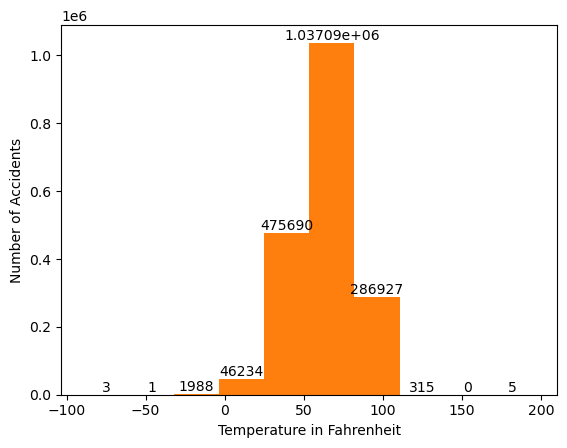

In [28]:
# Plotting histograms of the chosen numeric variables 
# 4. Temperature (present in the data set)

plt.hist(df_accident['Temperature(F)'].dropna(), bins=10)
plt.xlabel('Temperature in Fahrenheit')
plt.ylabel('Number of Accidents')

counts, edges, bars = plt.hist(df_accident['Temperature(F)'])
plt.bar_label(bars)
plt.show()


In [29]:
# Check summary stats
df_accident['Temperature(F)'].describe()

# We can see that 50% accident happened at temperature between 55 to 80 degree Fahrenheit.
# Let's look at how many cases we have which are more than 110 degrees Fahrenheit and less than -20 degrees. These seems to be anamoly.
# Let's also look at their distribution and corresponding locations.

count    1.848254e+06
mean     6.295582e+01
std      1.823979e+01
min     -8.900000e+01
25%      5.110000e+01
50%      6.490000e+01
75%      7.700000e+01
max      1.960000e+02
Name: Temperature(F), dtype: float64

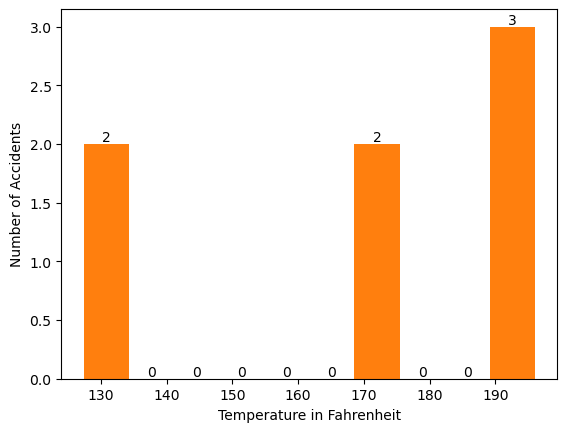

In [30]:
# Create a dataset with temperature more than 120 degrees and less than -20 degrees Fahrenheit
df_accident_high_temp = df_accident[df_accident['Temperature(F)'] > 120]
df_accident_low_temp = df_accident[df_accident['Temperature(F)'] < -20]

# Check the distribution of high temperature instances
plt.hist(df_accident_high_temp['Temperature(F)'].dropna(), bins=10)
plt.xlabel('Temperature in Fahrenheit')
plt.ylabel('Number of Accidents')

counts, edges, bars = plt.hist(df_accident_high_temp['Temperature(F)'])
plt.bar_label(bars)
plt.show()

In [31]:
# Lets review details of some accidents that occured at temperatures more than 110 degress Fahrenheits
# See the locations as well
pd.set_option('display.max_colwidth', 0)
df_accident_high_temp.loc[:,['Temperature(F)', 'traffic_event_type', 'Description', 'City', 'State']]

# These temperatures seems like bad data recordings and definitely can be treated as outliers. 
# See temperature in Chandler recorded at 170 degree Fahrenheit. I have lived in Chandler, AZ and I know that is never true.

Temperature(F) traffic_event_type  \
17518    127.4           Accident            
24105    129.2           Accident            
496322   196.0           Accident            
867812   196.0           Accident            
1108162  196.0           Accident            
2509205  170.6           Accident            
2626381  168.8           Accident            

                                                                                                                                         Description  \
17518    Between RM-1431/Chandler Rd/Exit 256 and Westinghouse Rd/Exit 257 - Accident.                                                                 
24105    At FM-1825 - Accident.                                                                                                                        
496322   Stationary traffic on US-11 N - AL-7 from AL-215/Old Montgomery Hwy (AL-7/US-11) to I-59 (Tuscaloosa)/I-20 (AL-7/US-11) due to accident.      
867812   Stationary traffic on US-11 N - US-82 W - AL-6 - AL-7 from US-11 to I-20 E due to accident.                                                   
1108162  Stationary traffic on US-11 N - AL-7 from AL-215/Old Montgomery Hwy (AL-7/US-11) to US-82/AL-6/McFarland Blvd (AL-7/US-11) due to accident.   
2509205  At Gilbert Rd/Exit 44 - Accident. Lane blocked.                                                                                               
2626381  At 137th St/Doty Ave/Exit 69 - Accident.                                                                                                      

                 City State  
17518    Round Rock    TX    
24105    Pflugerville  TX    
496322   Tuscaloosa    AL    
867812   Tuscaloosa    AL    
1108162  Tuscaloosa    AL    
2509205  Chandler      AZ    
2626381  Chicago       IL

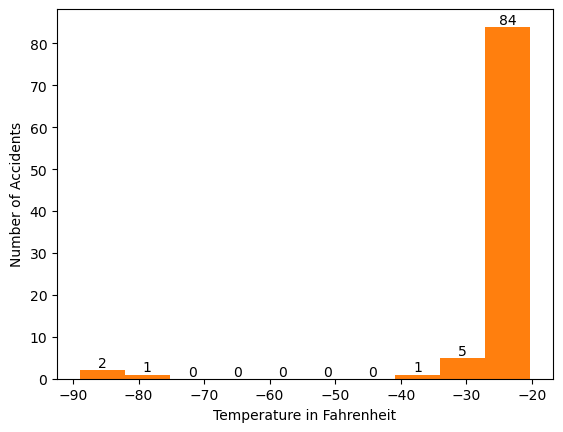

In [32]:
# Check the distribution of low temperature instances
plt.hist(df_accident_low_temp['Temperature(F)'].dropna(), bins=10)
plt.xlabel('Temperature in Fahrenheit')
plt.ylabel('Number of Accidents')

counts, edges, bars = plt.hist(df_accident_low_temp['Temperature(F)'])
plt.bar_label(bars)
plt.show()

In [33]:
# Lets review details of some accidents that occured at temperatures less than -20 degress Fahrenheits
# See the locations as well
pd.set_option('display.max_colwidth', 0)
df_accident_low_temp.loc[:,['Temperature(F)', 'traffic_event_type', 'Description', 'City', 'State']]

# Instances like -40 in Texas, -77.8 in NY seems like outliers or bad temperature captures.
# To ensure we can also check incident date and associate months to temperatures.

Temperature(F) traffic_event_type  \
91354   -20.2            Accident            
1482861 -21.0            Accident            
1520738 -28.0            Accident            
1525047 -22.0            Accident            
1542228 -23.0            Accident            
...       ...                 ...            
2547199 -21.3            Accident            
2547200 -20.9            Accident            
2648939 -40.0            Accident            
2716825 -77.8            Accident            
2772393 -22.0            Accident            

                                                                                                   Description  \
91354    Closed at CR-19 - Road closed due to accident.                                                          
1482861  Accident on Town Hall Rd/Glidden Rd (US-71) from CR-21/CR-23/Bemidji Rd (US-71) to US-71 N - US-71 S.   
1520738  Accident from I-80 W to US-75 S.                                                                        
1525047  Accident from Highway 169 / Nichols Ave to Highway 169.                                                 
1542228  Stationary traffic from US-75 N to Chandler Rd W due to accident.                                       
...                                                                    ...                                       
2547199  At WI-131/Exit 41 - Accident. Right lane blocked.                                                       
2547200  At Lillian St - Accident.                                                                               
2648939  Closed at Peach Ridge Rd/Exit 729/Exit 730 - Road closed due to accident. Vehicle fire.                 
2716825  At 7th Ave/Exit 20 - Accident.                                                                          
2772393  At US-701/4th Ave/Church St - Accident. Left lane blocked.                                              

               City State  
91354    Coalmont    CO    
1482861  Bemidji     MN    
1520738  Omaha       NE    
1525047  Virginia    MN    
1542228  Bellevue    NE    
...           ...    ..    
2547199  Tomah       WI    
2547200  Elgin       IL    
2648939  Brookshire  TX    
2716825  Brooklyn    NY    
2772393  Conway      SC    

[93 rows x 5 columns]

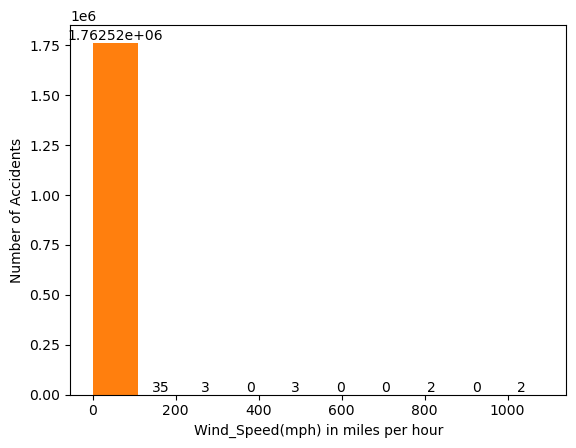

In [34]:
# Plotting histograms of the chosen numeric variables 
# 5. Wind_Speed(mph) - present in the dataset

plt.hist(df_accident['Wind_Speed(mph)'].dropna(), bins=10)
plt.xlabel('Wind_Speed(mph) in miles per hour')
plt.ylabel('Number of Accidents')

counts, edges, bars = plt.hist(df_accident['Wind_Speed(mph)'])
plt.bar_label(bars)
plt.show()


In [35]:
# Check the summary stats
df_accident['Wind_Speed(mph)'].describe()

# More than 80% of accidents seems to have happened at windspeed <= 11 mph
# Let's create two data sets with winspeed <= 11 and > 11 mph and see the distrbution of accident frequency


count    1.762568e+06
mean     7.743607e+00
std      5.538178e+00
min      0.000000e+00
25%      4.600000e+00
50%      7.000000e+00
75%      1.040000e+01
max      1.087000e+03
Name: Wind_Speed(mph), dtype: float64

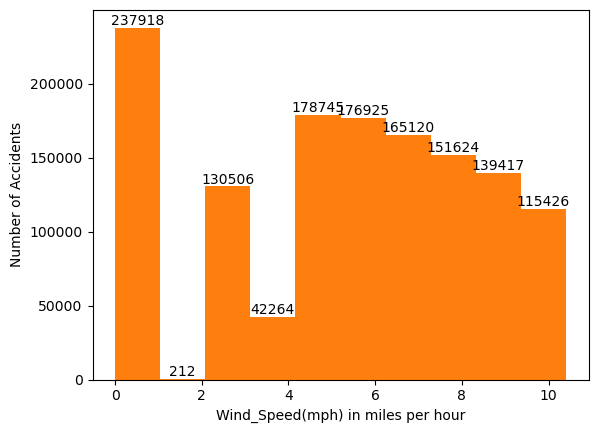

In [36]:
# Creating data set with wind less than 11 miles and checking the distribution
df_accident_wind_low = df_accident[df_accident['Wind_Speed(mph)'] <= 11]

plt.hist(df_accident_wind_low['Wind_Speed(mph)'].dropna(), bins=10)
plt.xlabel('Wind_Speed(mph) in miles per hour')
plt.ylabel('Number of Accidents')

counts, edges, bars = plt.hist(df_accident_wind_low['Wind_Speed(mph)'])
plt.bar_label(bars)
plt.show()

# There are a lot of accident cases when there was no to very low wind while there also seems to be concentration between 2 and 11 mph. 
# No obvious effects appears. We can't say that more wind causes more accidents.

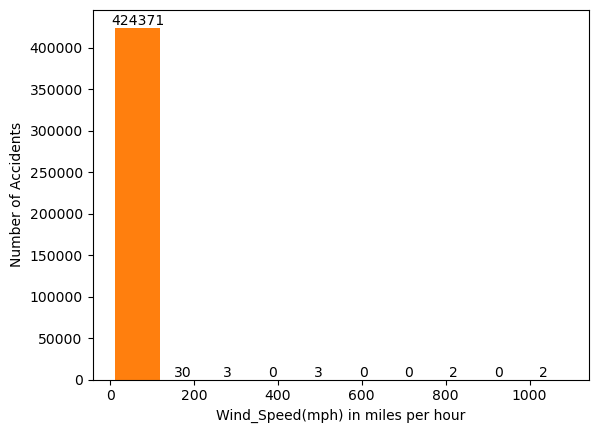

In [37]:
# Creating data set with wind more than 11 miles and checking the distribution
df_accident_wind_high = df_accident[df_accident['Wind_Speed(mph)'] > 11]

plt.hist(df_accident_wind_high['Wind_Speed(mph)'].dropna(), bins=10)
plt.xlabel('Wind_Speed(mph) in miles per hour')
plt.ylabel('Number of Accidents')

counts, edges, bars = plt.hist(df_accident_wind_high['Wind_Speed(mph)'])
plt.bar_label(bars)
plt.show()

In [38]:
# Check the summary stats of high wind cases
df_accident_wind_high['Wind_Speed(mph)'].describe()

count    424411.000000
mean     15.041538    
std      4.965122     
min      11.500000    
25%      12.700000    
50%      14.000000    
75%      16.100000    
max      1087.000000  
Name: Wind_Speed(mph), dtype: float64

In [39]:
# There are about 75% of cases with wind speed <= 17. Let's see how many cases are there with wind speead > 200 as this is 
# about the max wind speed recorded
df_accident_wind_high[df_accident_wind_high['Wind_Speed(mph)'] > 200].ID.count()

# There are only 10 cases, let see the details

10

In [40]:
pd.set_option('display.max_colwidth', 0)
df_accident_wind_high[df_accident_wind_high['Wind_Speed(mph)'] > 200].loc[:,['Wind_Speed(mph)', 'traffic_event_type', 'Description', 'City', 'State']]

# Below seems to bad recordings of wind speed and can can be safely ignored or treated as outliers.


Wind_Speed(mph) traffic_event_type  \
11454    822.8            Accident            
11463    822.8            Accident            
157532   471.8            Accident            
1414359  243.0            Accident            
1486460  1087.0           Accident            
2104007  232.0            Accident            
2225067  984.0            Accident            
2311795  518.0            Accident            
2311806  518.0            Accident            
2716994  245.1            Accident            

                                                           Description  \
11454    At CA-170 - Accident.                                           
11463    At Osborne St/Exit 154 - Accident.                              
157532   Closed at Cortona Blvd - Road closed due to accident.           
1414359  Accident on Woodside Rd exit [408] from Woodside Rd to CA-84.   
1486460  Accident from N Gurr Rd to Ashby Rd.                            
2104007  At Martin St/Exit 33 - Accident. Hard shoulder blocked.         
2225067  At SE Becker Rd/Exit 138 - Earlier accident.                    
2311795  At I-110/Harbor Fwy - Accident.                                 
2311806  At I-110/Harbor Fwy - Accident.                                 
2716994  At US-29 - Accident.                                            

                     City State  
11454    Pacoima           CA    
11463    Pacoima           CA    
157532   Jupiter           FL    
1414359  Redwood City      CA    
1486460  Atwater           CA    
2104007  Fort Worth        TX    
2225067  Port Saint Lucie  FL    
2311795  Carson            CA    
2311806  Carson            CA    
2716994  Pelzer            SC

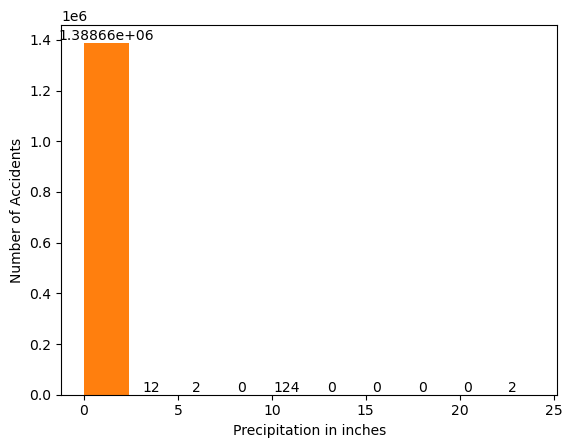

In [41]:
# Plotting histograms of the chosen numeric variables 
# 6. Precipitation(in) - present in the dataset

plt.hist(df_accident['Precipitation(in)'].dropna(), bins=10)
plt.xlabel('Precipitation in inches')
plt.ylabel('Number of Accidents')

counts, edges, bars = plt.hist(df_accident['Precipitation(in)'])
plt.bar_label(bars)
plt.show()


In [42]:
# Checking the summary stats

df_accident['Precipitation(in)'].describe()

count    1.388801e+06
mean     8.308872e-03
std      1.092733e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.400000e+01
Name: Precipitation(in), dtype: float64

In [43]:
# In case of 75% accidents there was no precipitation. There are only few cases with precipitation.
# Let's check the distribution of any case with precipitation more than 0
df_accident_precipitation=df_accident[df_accident['Precipitation(in)'] > 0]
df_accident_precipitation.ID.count()

131485

In [44]:
# Check the summary stats
df_accident_precipitation['Precipitation(in)'].describe()

count    131485.000000
mean     0.087762     
std      0.345181     
min      0.010000     
25%      0.010000     
50%      0.030000     
75%      0.090000     
max      24.000000    
Name: Precipitation(in), dtype: float64

In [45]:
# Less than 0.1 inches of rain is ususally considered light rainfall while anything more than 0.3 inches per hour is considered heavy
# Let's check how many cases we have of heavy rainfall
df_accident_precipitation_heavy = df_accident_precipitation[df_accident_precipitation['Precipitation(in)'] > 0.3]
df_accident_precipitation_heavy['Precipitation(in)'].describe()

count    6011.000000
mean     0.747902   
std      1.440197   
min      0.310000   
25%      0.350000   
50%      0.450000   
75%      0.620000   
max      24.000000  
Name: Precipitation(in), dtype: float64

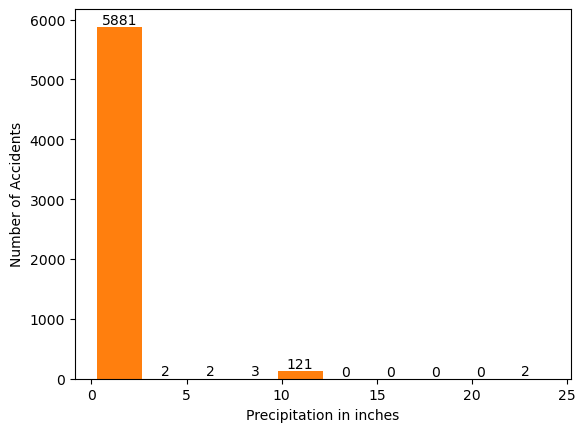

In [46]:
# Let's check the distribution and data for heavy rainfall dataset
plt.hist(df_accident_precipitation_heavy['Precipitation(in)'].dropna(), bins=10)
plt.xlabel('Precipitation in inches')
plt.ylabel('Number of Accidents')

counts, edges, bars = plt.hist(df_accident_precipitation_heavy['Precipitation(in)'])
plt.bar_label(bars)
plt.show()


In [47]:
# Definnitely there very few cases with 10+ inches of rainfall
# Let's check data for them
df_accident_precipitation_heavy[df_accident_precipitation_heavy['Precipitation(in)'] >  5].loc[:,['Precipitation(in)', 'traffic_event_type', 'Description', 'City', 'State']]

# Maximum rainfall in whole ever recorded in NY/NJ was in 1882 and that was 8.82 inches. Thus, precipitation below showing 9 and more are definitely 
# seems like anomaly or bad data capture or outliers which can be treated.


Precipitation(in) traffic_event_type  \
31626    9.99               Accident            
32358    9.91               Accident            
33739    9.94               Accident            
34665    9.93               Accident            
34974    9.96               Accident            
...       ...                    ...            
2754250  9.98               Accident            
2754774  9.99               Accident            
2754776  9.99               Accident            
2758002  9.98               Accident            
2766618  9.96               Accident            

                                                                        Description  \
31626    At Manhattan BR/Exit 29A - Accident.                                         
32358    At RT-27/Prospect Expy/Exit 24 - Accident.                                   
33739    At Williamsburg Bridge/Exit 32 - Accident.                                   
34665    At Atlantic Ave/Exit 27 - Accident.                                          
34974    At I-78/Jersey Ave - Accident.                                               
...                                 ...                                               
2754250  At Brooklyn Brg/Exit 2 - Accident. Left lane blocked. Center lane blocked.   
2754774  At Hamilton Ave/Exit 26 - Accident. Left lane blocked.                       
2754776  At Brooklyn Queens Expy - Accident. Left lane blocked.                       
2758002  At SR-29/Exit 80 - Accident. Right lane blocked.                             
2766618  At Tillary St/Exit 29 - Accident.                                            

                City State  
31626    Brooklyn     NY    
32358    Brooklyn     NY    
33739    Brooklyn     NY    
34665    Brooklyn     NY    
34974    Jersey City  NJ    
...              ...  ..    
2754250  New York     NY    
2754774  Brooklyn     NY    
2754776  Brooklyn     NY    
2758002  Ochopee      FL    
2766618  Brooklyn     NY    

[128 rows x 5 columns]

In [116]:
# Running pandas profile and creating data profile report to see if data needs cleansing 
# and take a deeper look at distinct values etc.
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("Data_Profiling_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Question 5 

Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

In [49]:
# We will compare distribution of severity of accidents by night and day

# Step 1 - Create two datasets with severity of accidents during day and during night
severity_night = df_accident[df_accident['Astronomical_Twilight'] == 'Night'].Severity
severity_day = df_accident[df_accident['Astronomical_Twilight'] == 'Day'].Severity

In [50]:
# Creating pmfs of above to datasets
pmf_severity_night =  thinkstats2.Pmf(severity_night)
pmf_severity_day =  thinkstats2.Pmf(severity_day)


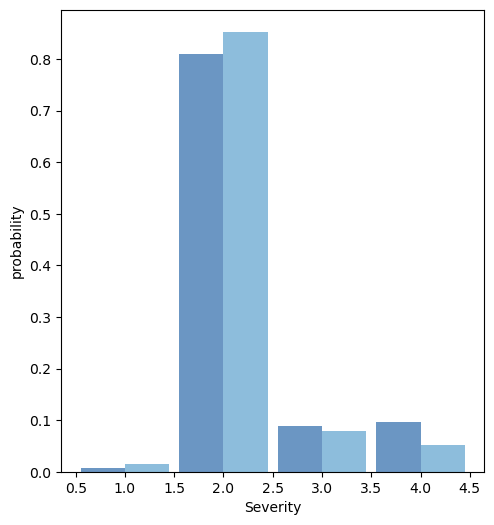

In [51]:
# Plotting the probability mass function or pmfs of accident severity at night vs accident severity at the day time
width = 0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf_severity_night, align='right', width=width)
thinkplot.Hist(pmf_severity_day, align='left', width=width)
thinkplot.Config(xlabel='Severity',
                 ylabel='probability')

In [52]:
# Observation - 
# 1. Interestingly low to medium severity accidents have slighly higher probability of occurence during night time.
# 2. And higher severity accidents have higher probability to occur in day time. Severity 4 accidents have almost 10% probability 
#    of happening in day time while only about 6% probability of them happening at the night time.

# 1. LOCATION Analysis
#### In this dataset, we have different attributes like City, State, 
#### Timezone and even street for each accident records. 
#### Here we will analyze these four features based on the no. of cases 
#### for each distinct location.

In [53]:
#  Across all traffic events see distribution by State, CityStateCountry, Traffic_Event_Type
df_state = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})
df_traffic_events = pd.DataFrame(df['traffic_event_type'].value_counts()).reset_index().rename(columns={'index':'traffic_event_type', 'traffic_event_type':'Cases'})


In [54]:
%matplotlib inline

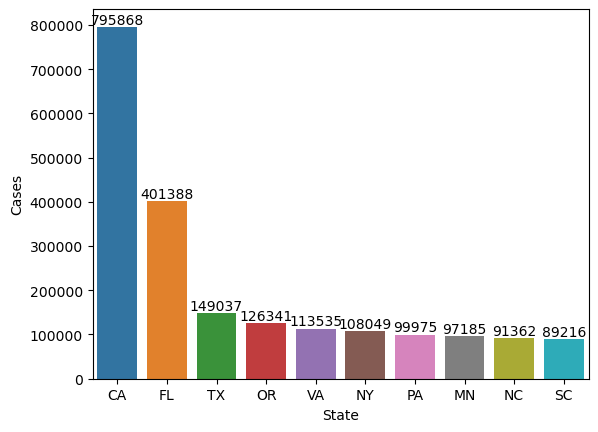

In [55]:
# Plot the bar chart showing traffic cases sorted from high to low for top 10 States by number of cases
state_barplot=sns.barplot(data=df_state.nlargest(10, 'Cases'), x="State", y="Cases")
state_barplot.bar_label(state_barplot.containers[0])
plt.show()

############################### OBSERVATION ################################
# Based on data set at hand we can clearly see that most cases happened in CA about 800,000 of them, next one is Florida
# which is just about half with 400,000 noticed cases.


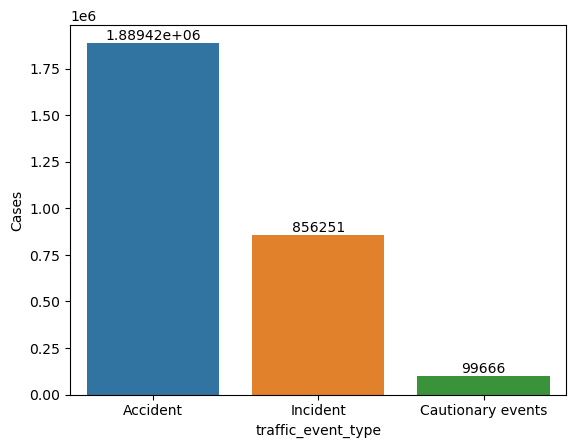

traffic_event_type  Cases  
Accident            1889425    1
Cautionary events   99666      1
Incident            856251     1
dtype: int64

In [56]:
# Plot the bar chart showing traffic cases sorted from high to low for each traffic_event_type
traffic_event_type_barplot=sns.barplot(data=df_traffic_events, x="traffic_event_type", y="Cases")
# Add counts on each bar
traffic_event_type_barplot.bar_label(traffic_event_type_barplot.containers[0])
plt.show()

############################### OBSERVATION ################################
# Based on data set at hand we can clearly see that most of the cases are accident cases. 
# About 3/4th of the data. 20% is about incidents and ~5% about cautionary events.

df_traffic_events.value_counts()

In [57]:
# Next it will be good idea to see the distribution of types of traffic events amongst top 10 states states
# To do this we will need a new data set grouped by both traffic event types and state
df_state_traffic_event = df.groupby(["State", "traffic_event_type"]).size().reset_index(name="Cases")
df_state_traffic_event.value_counts()

State  traffic_event_type  Cases
AL     Accident            8563     1
       Cautionary events   94       1
NV     Accident            5189     1
       Cautionary events   8        1
       Incident            1000     1
                                   ..
LA     Accident            20715    1
       Cautionary events   266      1
       Incident            26251    1
MA     Accident            5412     1
WY     Incident            371      1
Length: 144, dtype: int64

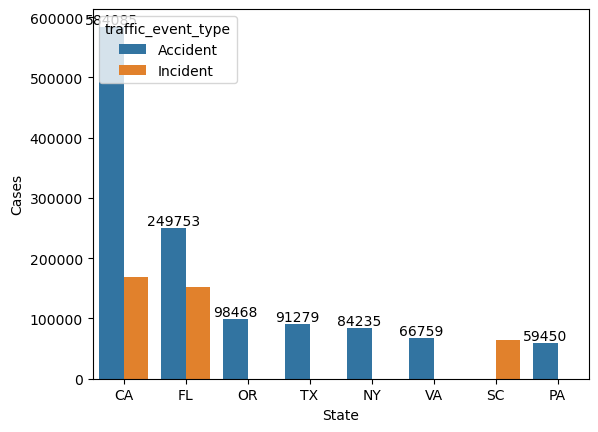

In [58]:
# Next plotting stacked bar chart to show frequency by state while within each state observing distribution
# by traffic event types
state_traffic_bar = sns.barplot(data=df_state_traffic_event.nlargest(10, 'Cases'), x="State", y="Cases", hue="traffic_event_type")
state_traffic_bar.bar_label(state_traffic_bar.containers[0])
plt.show()

In [261]:
###################################### OBSERVATION #######################################
# We can clearly see that the largest number of accident cases were in CA from 2016 to 2021.
# Number of accidents is CA were 584,085 out of total 1889425 accidents across all states,
# which was about 31% of total accidents.
# Second largest number of accidents were in FL, which was about additional 13% of accidents.
# Thus, just between CA and FL we had about 44% of all accidents in the United States between 
# 2016 and 2021. Both states had similar number of incidents during that time.


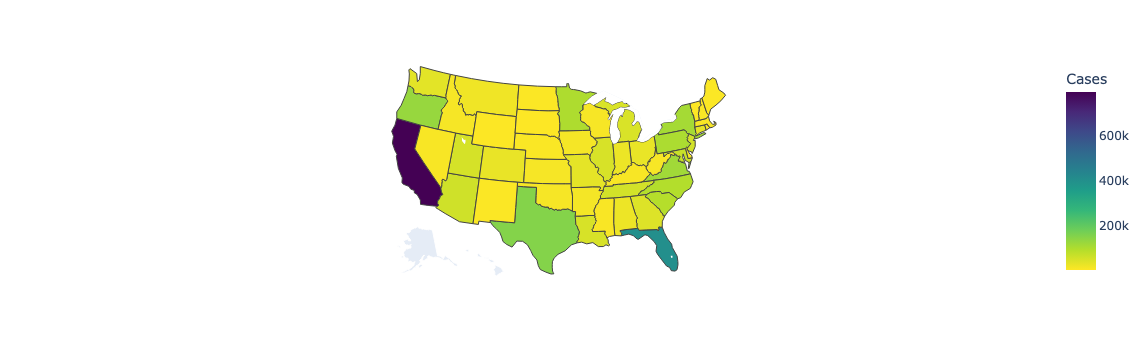

In [59]:
# Yet another thing we can do is to plot Cases on US map to see which state had maximum, minimum, and medium cases
# We cal also do this only with accident cases to make sure our observation holds true for accidents
fig = px.choropleth(df_state,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Cases',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()

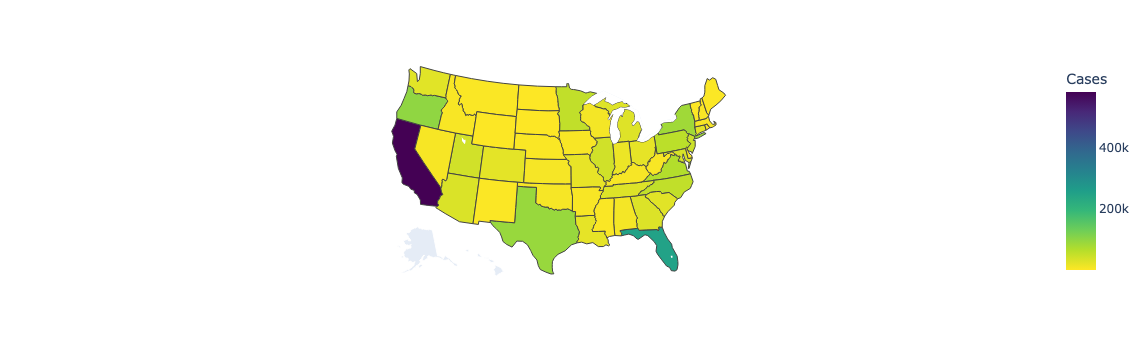

In [60]:
###################################### OBSERVATION #######################################
# Mid west except Texas seems to have very low traffic events reported.
# Considering size of the state I feel New Mexico only reported 2370 cases 
# from 2016 to 2021 which sounds incredibly low.
# WY is probably next considering size of state with only 990 cases in about 6 years period.
# Followed by South Dakota 

# Let's take a look at dataset with only accident cases
df_accident=df[df["traffic_event_type"] == 'Accident'] 
df_state_accident = pd.DataFrame(df_accident['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})

# Plot Accidents on the US map
fig = px.choropleth(df_state_accident,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Cases',
                    color_continuous_scale="Viridis_r", 
                    
                    )
fig.show()


In [264]:
###################################### OBSERVATION #######################################
# Accidents haev almost the same distribution across US states as all the traffic event cases.
# Mid west except Texas seems to have very low traffic events reported.
# Considering size of the state New Mexico only reported 1674 accident cases 
# from 2016 to 2021 which sounds incredibly low.
# WY is probably next considering size of state with only 555 accident cases in about 6 years period.
# Followed by Nebraska, South Dakota etc.


In [61]:
# May be one more thing we can also do is to check top 10 Accident frequency distribution for US cities
df_city_accident = pd.DataFrame(df_accident['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})
df_city_accident.value_counts()



City           Cases
Aaronsburg     7        1
Orting         35       1
Orosi          86       1
Orovada        14       1
Oroville       560      1
                       ..
Gaylordsville  4        1
Gays Mills     2        1
Gazelle        4        1
Geismar        5        1
Zwingle        4        1
Length: 10756, dtype: int64

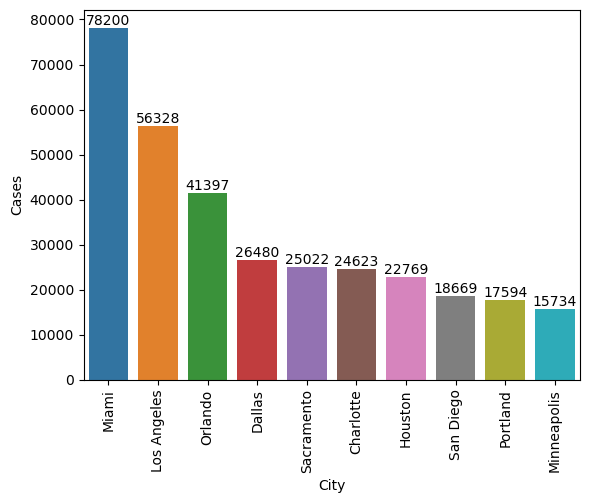

In [62]:
# Plot the bar chart showing accident cases sorted from high to low for top 10 US cities 
city_barplot=sns.barplot(data=df_city_accident.nlargest(10, 'Cases'), x="City", y="Cases")
city_barplot.bar_label(city_barplot.containers[0])
plt.xticks(rotation=90)
plt.show()

In [39]:
###################################### OBSERVATION #######################################
# Surprisingly though Florida has less than half that many accident cases we have in California,
# still Miami has maximum number of accident cases from 2016 to 2021 across all US cities.
# We can also see Orlando has third number of accident cases.
# California on the other hand has 3 cities in top 10. At 2nd spot we have Los Angeles, 
# at 5th we have Sacremento and at 8th we have San Diego.

# 2. Time duration Analysis
#### In this dataset, we have different Traffic event types. I am interested in looking at 
#### "Accidents" vs "Rollover/Overturns" while comparing time duration from the start
#### to the end of the event i.e. time since when it started to the time when it ended / cleared traffic.
#### Hypothesis : Rollovers take more time to clear traffic than accidents.
#### We will compare the CDF plots of two datasets to find out


In [63]:
# Deriving buckets of traffic events including overturning or rollover
df['traffic_event_type_ext'] = np.where(
     df['Description'].str.contains("Rollover|roll over|rollover|over turn|overturn")==True, 'Rollover', 
     np.where(
        df['Description'].str.contains("Accident|accident|crash|Crash")==True, 'Accident',
        np.where(
        df['Description'].str.contains("Incident|incident")==True, 'Incident', 'Cautionary events'         
                )
     )
)

df['traffic_event_type_ext'].value_counts()

Accident             1889402
Incident             856251 
Cautionary events    99491  
Rollover             198    
Name: traffic_event_type_ext, dtype: int64

In [65]:
# Creating a new data frame with only accident and Rollover traffic event cases
# Also keeping only required columns for testing the hypothesis
df_accident_rollover = df[df['traffic_event_type_ext'].str.contains("Accident|Rollover")==True]
df_accident_rollover['traffic_event_type_ext'].value_counts()

Accident    1889402
Rollover    198    
Name: traffic_event_type_ext, dtype: int64

In [66]:
# Selecting only required columns for analysis
df_accident_rollover_time = df_accident_rollover[['traffic_event_type_ext','Start_Time','End_Time']]
df_accident_rollover_time.head()

traffic_event_type_ext          Start_Time            End_Time
0  Accident              2016-02-08 00:37:08 2016-02-08 06:37:08
1  Accident              2016-02-08 05:56:20 2016-02-08 11:56:20
2  Accident              2016-02-08 06:15:39 2016-02-08 12:15:39
3  Accident              2016-02-08 06:51:45 2016-02-08 12:51:45
4  Accident              2016-02-08 07:53:43 2016-02-08 13:53:43

In [67]:
# Creating a derived column to capture time difference between start and end time i.e. total time in which traffic
# event was cleared
df_accident_rollover_time['hours_diff'] = (df_accident_rollover_time.End_Time - df_accident_rollover_time.Start_Time) / pd.Timedelta(hours=1)
df_accident_rollover_time['hours_diff'].value_counts()


6.000000     352024
4.000000     54925 
0.250000     36680 
0.500000     35110 
1.000000     27562 
             ...   
8.887222     1     
13.197778    1     
10.309722    1     
16.012778    1     
23.654722    1     
Name: hours_diff, Length: 61948, dtype: int64

In [68]:
# We can see that there are very few traffic cases which took more time while most traffic cases got cleared 
# in about 6 hours
# Create a dataset with only accident events and diff_hours as a measure
df_traffic_accident_time = df_accident_rollover_time[df['traffic_event_type_ext'].str.contains("Accident")==True]
df_traffic_accident_time = df_traffic_accident_time[['traffic_event_type_ext','hours_diff']]
df_traffic_accident_time.head()


traffic_event_type_ext  hours_diff
0  Accident               6.0       
1  Accident               6.0       
2  Accident               6.0       
3  Accident               6.0       
4  Accident               6.0

In [69]:
# Create a dataset with only rollover events and diff_hours as a measure
df_traffic_rollover_time = df_accident_rollover_time[df['traffic_event_type_ext'].str.contains("Rollover")==True]
df_traffic_rollover_time = df_traffic_rollover_time[['traffic_event_type_ext','hours_diff']]
df_traffic_rollover_time.head()


traffic_event_type_ext  hours_diff
259073  Rollover               1.460556  
326563  Rollover               4.431667  
359278  Rollover               2.233056  
423984  Rollover               2.584444  
472334  Rollover               1.349722

In [70]:
# Checking if the two datasets are normally distributed. 
from scipy.stats import norm

# 1. Plotting CDFs of accidents data vs CDFs of rollover data
# Keeping only the hours diff
hours_diff_accidents = df_traffic_accident_time['hours_diff']
hours_diff_rollover = df_traffic_rollover_time['hours_diff']

# Check summary stats of accidents data time
hours_diff_accidents.describe()

count    1.889402e+06
mean     4.155005e+00
std      8.637130e+01
min      3.333333e-02
25%      6.311111e-01
50%      2.083889e+00
75%      6.000000e+00
max      2.546689e+04
Name: hours_diff, dtype: float64

In [71]:
# Outlier clesn up
# We can see that 75 percentile is 6 hrs and thus considering any occurrence more of than 8 hrs outlier 
# and removing them
hours_diff_accidents = hours_diff_accidents[hours_diff_accidents <= 8]
hours_diff_accidents.describe()

count    1.789041e+06
mean     2.577648e+00
std      2.155474e+00
min      3.333333e-02
25%      5.827778e-01
50%      2.038611e+00
75%      4.066667e+00
max      8.000000e+00
Name: hours_diff, dtype: float64

In [72]:
# Check summary stats of rollover data time
hours_diff_rollover.describe()

count    198.000000
mean     1.260707  
std      1.985262  
min      0.250000  
25%      0.500000  
50%      0.750000  
75%      1.000000  
max      22.613333 
Name: hours_diff, dtype: float64

In [73]:
# Outlier clesn up
# We can see that 75 percentile is 1 hr and thus considering any occurrence 
# more of than 8 hrs outlier (same as accidents)
# and removing them
hours_diff_rollover = hours_diff_rollover[hours_diff_rollover <= 8]
hours_diff_rollover.describe()

count    196.000000
mean     1.115044  
std      1.164725  
min      0.250000  
25%      0.500000  
50%      0.750000  
75%      1.000000  
max      7.581944  
Name: hours_diff, dtype: float64

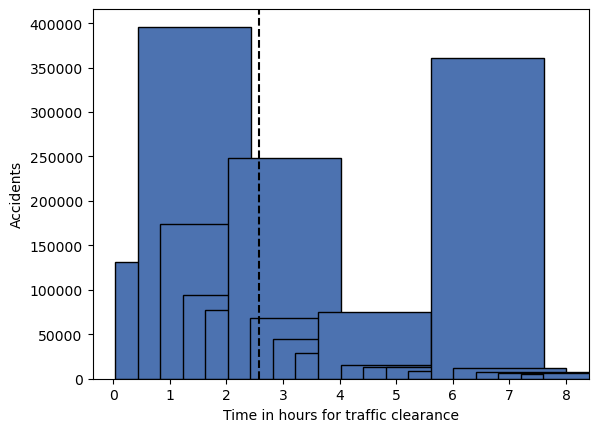

In [74]:
# plot the histogram of hours_diff for accidents data
plt.style.use('seaborn-deep')
plt.hist(np.array(hours_diff_accidents), width = 2, edgecolor = "black", bins=20)

# Label the axes
plt.xlabel('Time in hours for traffic clearance')
plt.ylabel('Accidents')

m = statistics.mean(hours_diff_accidents)
plt.axvline(m, color='k', linestyle='dashed')

# Show the figure
plt.show()


# We can see that amongst accident cases there are lot of cases that got cleared quickly while there 
# are quite a bit that took 6 to 7 hrs.

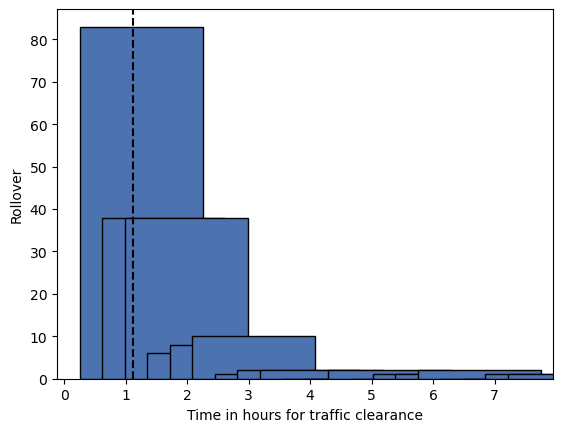

In [75]:
# plot the histogram of hours_diff for rollover data
plt.style.use('seaborn-deep')
plt.hist(np.array(hours_diff_rollover), width = 2, edgecolor = "black", bins=20)

# Label the axes
plt.xlabel('Time in hours for traffic clearance')
plt.ylabel('Rollover')

m = statistics.mean(hours_diff_rollover)
plt.axvline(m, color='k', linestyle='dashed')

# Show the figure
plt.show()


# Most of the rollover cases seems to have got cleared within first 3 hrs, 
# we have some one of outliers that took more than 4 hrs.

# Question 6
Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4)

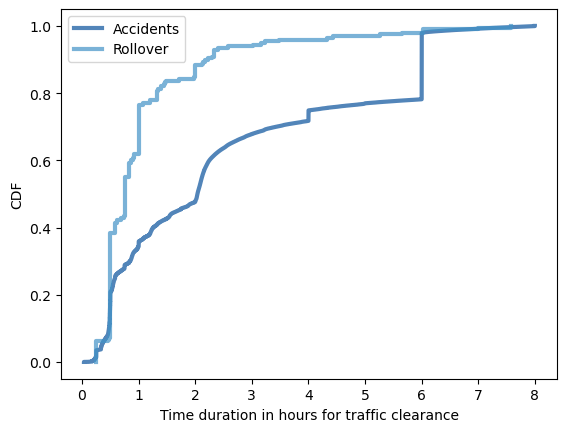

<Figure size 800x600 with 0 Axes>

In [76]:
import thinkstats2
import thinkplot

# Plot the CDFs
cdf_accidents = thinkstats2.Cdf(hours_diff_accidents, label='Accidents')
cdf_rollover = thinkstats2.Cdf(hours_diff_rollover, label='Rollover')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf_accidents, cdf_rollover])
thinkplot.Show(xlabel='Time duration in hours for traffic clearance', ylabel='CDF')


In [292]:
######################################################### OBSERVATION ########################################################################
# CDF plots above compares probabilities of time duration for clearance in accident events vs rollover events.
# At a very high level looking at CDF plot we can say that traffic due to rollovers were cleared much quickly than accident events.
# We can see clearly that about 80% of rollover traffic cases were resolved in 1 hr and about 90% in 2.5 to 3 hrs.
# We can also see that about 70% of the accident cases took about 4 hrs, while 80% were cleared 
# in about 6 hrs and 90-100% by 7/7.5 hrs.

# Conclusion based on sample at hand, accident cases took about 4 times the amount of time it took 
# for rollover traffic cases to be cleared
#############################################################################################################################################

# Question 7
Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

In [77]:
# I believe accidents can occur anytime and the time difference between accidents should be equally spaced. 
# To proof the same I will create a dataset with time differences and plot an exponential distribution and 
# compare it with ideal exponential distribution's shape

# Create a dataset with time differences between current and previous accidents in minutes
df_accident_time = pd.DataFrame(df_accident['Start_Time'])
df_accident_time.dropna(inplace = True)
df_accident_time.drop_duplicates(inplace = True)

# Sort the dataset by date in descending order
df_accident_time.sort_values(by=['Start_Time'], inplace=True) 

# Create an additional column showing next row or next accident event start date time
df_accident_time['Next_Accident_Time'] = df_accident_time['Start_Time'].shift(-1)

# Create a new column keep the difference between next accident and current accident
df_accident_time['Time_Between_Accidents_Minutes'] = (df_accident_time.Next_Accident_Time - df_accident_time.Start_Time) / pd.Timedelta(minutes=1)
df_accident_time.loc[:,['Start_Time', 'Next_Accident_Time', 'Time_Between_Accidents_Minutes']]
df_accident_time.head()


Start_Time  Next_Accident_Time  Time_Between_Accidents_Minutes
137485 2016-01-14 20:18:33 2016-02-08 00:37:08  34818.583333                  
0      2016-02-08 00:37:08 2016-02-08 05:56:20  319.200000                    
1      2016-02-08 05:56:20 2016-02-08 06:15:39  19.316667                     
2      2016-02-08 06:15:39 2016-02-08 06:51:45  36.100000                     
3      2016-02-08 06:51:45 2016-02-08 07:53:43  61.966667

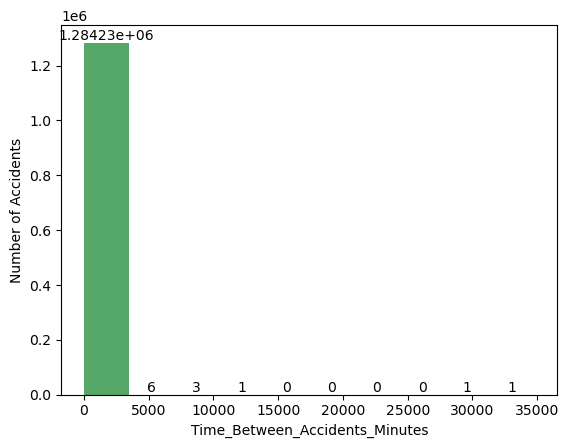

In [78]:
# Check the distribution of the "Time_Between_Accidents_Minutes"
plt.hist(df_accident_time['Time_Between_Accidents_Minutes'].dropna(), bins=10)
plt.xlabel('Time_Between_Accidents_Minutes')
plt.ylabel('Number of Accidents')

counts, edges, bars = plt.hist(df_accident_time['Time_Between_Accidents_Minutes'])
plt.bar_label(bars)
plt.show()

In [79]:
# Clearly we have outliers / edge cases which we should remove
# Check summary stats
df_accident_time['Time_Between_Accidents_Minutes'].describe()

# We can see that 75% of the data has about 2.21 minutes as time diff between current and next accident
# Filter out the data with only times diffs upto 10 and check the distribution again
df_accident_time_minus_outliers = df_accident_time[df_accident_time['Time_Between_Accidents_Minutes'] <=  10]
df_accident_time_minus_outliers['Time_Between_Accidents_Minutes'].describe()


count    1.238586e+06
mean     1.536117e+00
std      1.762860e+00
min      1.666667e-02
25%      4.500000e-01
50%      1.000000e+00
75%      2.000000e+00
max      1.000000e+01
Name: Time_Between_Accidents_Minutes, dtype: float64

In [80]:
# Checking distribution in outliers only
df_accident_time_only_outliers = df_accident_time[df_accident_time['Time_Between_Accidents_Minutes'] >  10]
df_accident_time_only_outliers['Time_Between_Accidents_Minutes'].describe()

# We can see that in the dataset we identified as outlier, 75% of that has 25 as time diff

count    45660.000000
mean     27.023631   
std      239.020806  
min      10.016667   
25%      12.283333   
50%      16.100000   
75%      24.600000   
max      34818.583333
Name: Time_Between_Accidents_Minutes, dtype: float64

In [81]:
# Calculate the cdf of time differences between accidents
cdf = thinkstats2.Cdf(df_accident_time_minus_outliers['Time_Between_Accidents_Minutes'], label='actual')

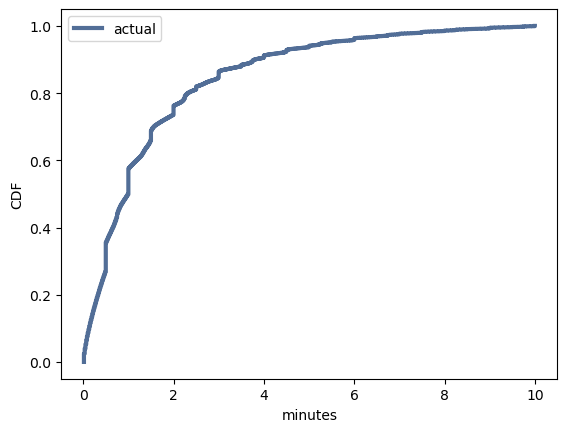

<Figure size 800x600 with 0 Axes>

In [82]:
# Plot the data 
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='minutes', ylabel='CDF')

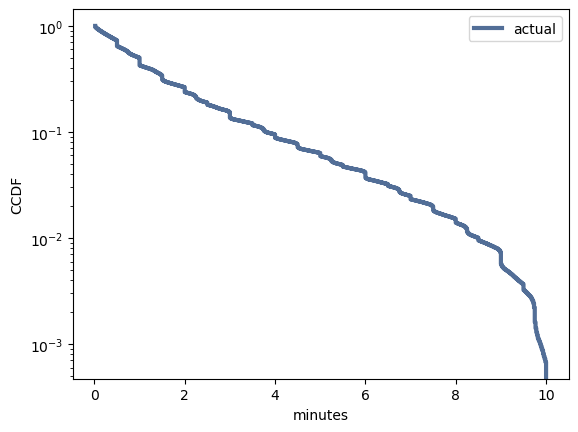

<Figure size 800x600 with 0 Axes>

In [83]:
# General shape of the cdf plot is exponnetial shape, in order to proof that exponnetial we can plot the complementary cdf
# on log y scale. This should be approximately straight line
# Let's check

thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel='minutes',
                   ylabel='CCDF',
                   yscale='log')

# Observation - If we exacly remove some of the low frequency values beyond 2.5 time diff we can further smooth out the line below, 
# specially between 5 and 10, but almost a straight line proofs that exponential distribution can be used to represent the time differences 
# between two accidents

# Question 8
Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

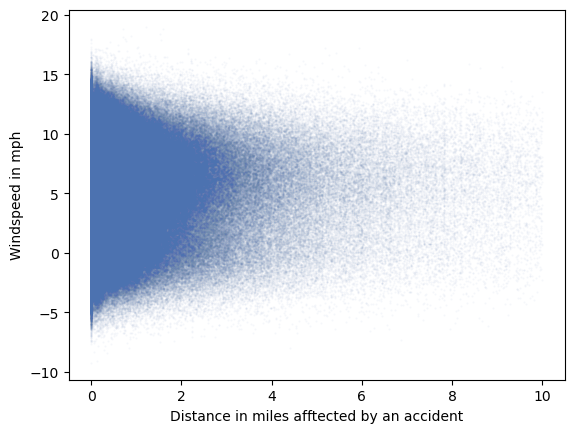

In [84]:
################################### Scatter plot # 1 #################################################
# Plotting first scatter plot between Windspeed at the time accident event was logged and distimance 
# in miles i.e. traffic congestion in miles caused by traffic accident
######################################################################################################

# Based on outliers observation, considering only accident cases that impacted <= 10 miles
df_accident_less_dist_outliers = df_accident[df_accident['Distance(mi)'] <= 10]
# Also, filtering out anything with windspeed more than 10 miles per hour
df_accident_less_outliers = df_accident_less_dist_outliers[df_accident_less_dist_outliers['Wind_Speed(mph)'] <= 10]

# Extracting the columns we are interested in
distance = df_accident_less_outliers['Distance(mi)']
windspeed = df_accident_less_outliers['Wind_Speed(mph)']

# Introducing Windspeed jitter / random values to make the relation not look discrete
windspeed_jitter = windspeed + np.random.normal(0, 2, size=len(df_accident_less_outliers))

# Plotting scatterplot
plt.plot(distance, windspeed_jitter, 'o', alpha=0.04, markersize = 0.6)
plt.xlabel('Distance in miles afftected by an accident')
plt.ylabel('Windspeed in mph')
plt.show()

# There appears to very low positive correlation between distance and windspeed by looking at scatterplot

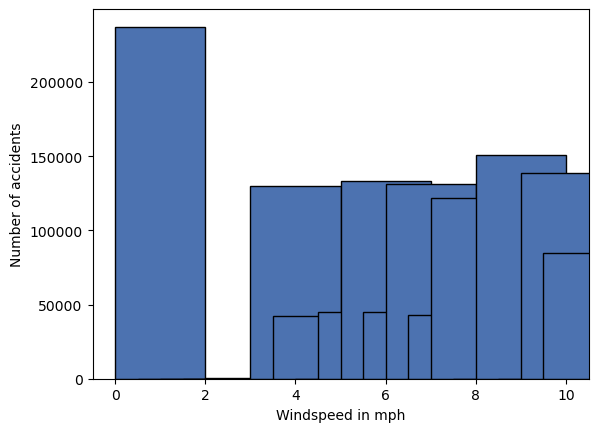

In [85]:
# Calculating Pearson's and Spearman's correlation coefficients

# Checking if distribution of windspeed is normal
plt.style.use('seaborn-deep')
plt.hist(np.array(windspeed), width = 2, edgecolor = "black", bins=20)
plt.xlabel('Windspeed in mph')
plt.ylabel('Number of accidents')
plt.show()

# Windspeed is pretty uniformally distributed

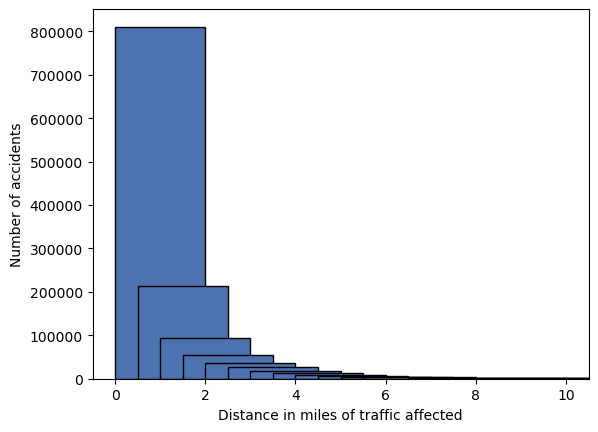

In [86]:
# Checking if distribution of distance is normal
plt.style.use('seaborn-deep')
plt.hist(np.array(distance), width = 2, edgecolor = "black", bins=20)
plt.xlabel('Distance in miles of traffic affected')
plt.ylabel('Number of accidents')
plt.show()


In [87]:
# We cannot consider the value of Pearson's correlation as data in either variable is not normally distributed

# Calculating Pearson's correlation
print('Corr', thinkstats2.Corr(distance, windspeed))
print('SpearmanCorr', thinkstats2.SpearmanCorr(distance, windspeed))

# It does not appear that there exists absolutely visible correlation between variables and thus we do not see any cause and effect 
# relational as well

Corr -0.017561050055533697
SpearmanCorr 0.007771691749509783


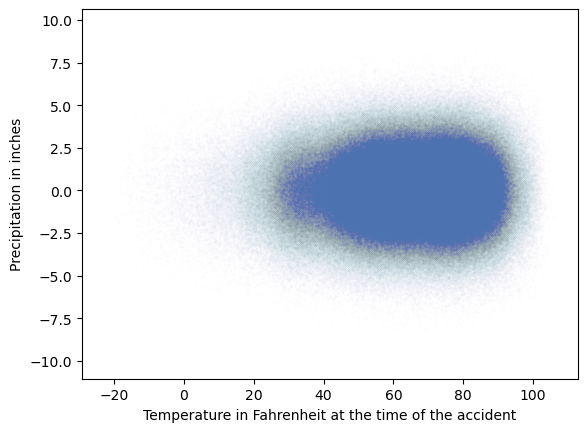

In [88]:
################################### Scatter plot # 2 #################################################
# Plotting second scatter plot between Temperature at the time accident event was logged and 
# precipitation in inches 
######################################################################################################

# Based on outliers observation, considering only accident which were logged when temperature was <= 100 degrees Fahrenheit
df_accident_less_temp_outliers = df_accident[df_accident['Temperature(F)'] <= 100]
df_accident_less_temp_outliers = df_accident_less_temp_outliers[df_accident_less_temp_outliers['Temperature(F)'] > -20 ]
# Also, filtering out anything with precipitation in inches more than 0.3 inches
df_accident_less_outliers = df_accident_less_temp_outliers[df_accident_less_temp_outliers['Precipitation(in)'] <= 0.3]

# Extracting the columns we are interested in
temperature = df_accident_less_outliers['Temperature(F)']
precipitation = df_accident_less_outliers['Precipitation(in)']

# Introducing temperarture and precipitation jitter / random values to make the relation not look discrete
precipitation_jitter = precipitation + np.random.normal(0, 2, size=len(df_accident_less_outliers))
temperature_jitter = temperature + np.random.normal(0, 2, size=len(df_accident_less_outliers))

# Plotting scatterplot
plt.plot(temperature_jitter, precipitation_jitter, 'o', alpha=0.03, markersize = 0.2)
plt.xlabel('Temperature in Fahrenheit at the time of the accident')
plt.ylabel('Precipitation in inches')
plt.show()


# There does not seems to be any obvious correlation

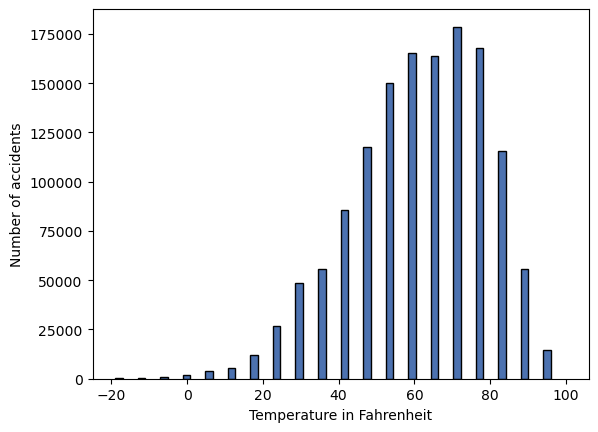

In [89]:
# Calculating Pearson's and Spearman's correlation coefficients

# Checking if distribution of temperature is normal
plt.style.use('seaborn-deep')
plt.hist(np.array(temperature), width = 2, edgecolor = "black", bins=20)
plt.xlabel('Temperature in Fahrenheit')
plt.ylabel('Number of accidents')
plt.show()

# temperature spread seems nearly normal but discrete. 

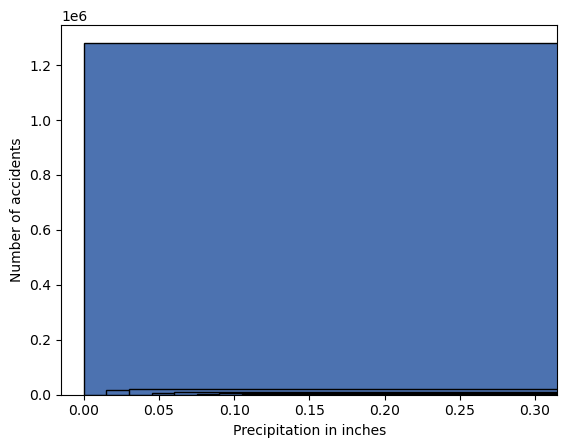

In [117]:
# Checking if distribution of precipitation is normal
plt.style.use('seaborn-deep')
plt.hist(np.array(precipitation), width = 2, edgecolor = "black", bins=20)
plt.xlabel('Precipitation in inches')
plt.ylabel('Number of accidents')
plt.show()

# Precipitation data seems to be uniformly distributed

In [91]:
# We cannot consider the value of Pearson's correlation as data in precipitation is not normally distributed

# Calculating Pearson's correlation
print('Corr', thinkstats2.Corr(temperature, precipitation))
print('SpearmanCorr', thinkstats2.SpearmanCorr(temperature, precipitation))

# Strength of correlation is low and distribution of precipitation is not normal and thus we cannot consider it for 
# any cause an effect relationship

Corr -0.06202469896244192
SpearmanCorr -0.15457322184813907


# Question 9
Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [397]:
################################################# Hypothesis testing #######################################################
# Hypothesis to test : There exists difference between "time duration to clear the traffic" because of accident 
#                      and in case of other road events i.e. rollover, road work etc.
# Type of test : Two tail test
# Test Statistic : Mean differences
# Other choice of test : Chi square test
############################################################################################################################

In [92]:
# To compute the p-value of an observed difference in means, we can assume that there is no difference between the groups 
# and generate simulated results by shuffling the data.

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [93]:
# Chi-squared test for traffic congestion length

class TrafficCongestionTest(thinkstats2.HypothesisTest):

    def MakeModel(self):
        firsts, others = self.data
        self.n = len(firsts)
        self.pool = np.hstack((firsts, others))

        pmf = thinkstats2.Pmf(self.pool)
        self.values = range(35, 44)
        self.expected_probs = np.array(pmf.Probs(self.values))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    def TestStatistic(self, data):
        firsts, others = data
        stat = self.ChiSquared(firsts) + self.ChiSquared(others)
        return stat

    def ChiSquared(self, lengths):
        hist = thinkstats2.Hist(lengths)
        observed = np.array(hist.Freqs(self.values))
        expected = self.expected_probs * len(lengths)
        stat = sum((observed - expected)**2 / expected)
        return stat

In [97]:
# Running three different tests
# test1: difference in mean pregnancy length
# test2: chi-square test of pregnancy length

def RunTests(df, iters=1000):
    """Runs the tests from Chapter 9 with a subset of the data.

    live: DataFrame
    iters: how many iterations to run
    """
    n = len(df)
    accident = df[df['traffic_event_type_ext'].str.contains("Accident")==True]
    non_accident = df[df['traffic_event_type_ext'].str.contains("Accident")==False]
    accident.drop_duplicates()
    non_accident.drop_duplicates()
    
    accident['mins_diff'] = (accident.End_Time - accident.Start_Time) / pd.Timedelta(minutes=1)
    non_accident['mins_diff'] = (non_accident.End_Time - non_accident.Start_Time) / pd.Timedelta(minutes=1)
    
    # compare traffic congestion time durations
    data = accident['mins_diff'], non_accident['mins_diff']
    ht = DiffMeansPermute(data)
    p1 = ht.PValue(iters=iters)

    data = (accident['mins_diff'].dropna().values,
            non_accident['mins_diff'].dropna().values)
    ht = DiffMeansPermute(data)
    p2 = ht.PValue(iters=iters)

    # compare traffic congesion time durations (chi-squared)
    ht = TrafficCongestionTest(data)
    p4 = ht.PValue(iters=iters)

    print('%d\t%0.2f\t%0.2f\t%0.2f\t' % (n, p1, p2, p4))

In [98]:
# Run the tests and print the stats
n = len(df)
for _ in range(7):
    sample = thinkstats2.SampleRows(df, n)
    RunTests(sample)
    n //= 2

2845342	0.00	0.00	0.00	
1422671	0.00	0.00	0.00	
711335	0.00	0.00	0.00	
355667	0.00	0.00	0.00	
177833	0.00	0.00	0.00	
88916	0.00	0.00	0.00	
44458	0.00	0.00	0.00	


In [99]:
df_accident.head()

ID  Severity          Start_Time            End_Time  Start_Lat  \
0  A-1  3        2016-02-08 00:37:08 2016-02-08 06:37:08  40.108910   
1  A-2  2        2016-02-08 05:56:20 2016-02-08 11:56:20  39.865420   
2  A-3  2        2016-02-08 06:15:39 2016-02-08 12:15:39  39.102660   
3  A-4  2        2016-02-08 06:51:45 2016-02-08 12:51:45  41.062130   
4  A-5  3        2016-02-08 07:53:43 2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870  3.230          
1 -84.062800  39.865010 -84.048730  0.747          
2 -84.524680  39.102090 -84.523960  0.055          
3 -81.537840  41.062170 -81.535470  0.123          
4 -84.492792  39.170476 -84.501798  0.500          

                                                                  Description  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentangy Riv Rd/Exit 22 - Accident.   
1  At OH-4/OH-235/Exit 41 - Accident.                                           
2  At I-71/US-50/Exit 1 - Accident.                                             
3  At Dart Ave/Exit 21 - Accident.                                              
4  At Mitchell Ave/Exit 6 - Accident.                                           

   Number       Street Side        City      County State Zipcode Country  \
0 NaN      Outerbelt E  R    Dublin      Franklin    OH    43017   US       
1 NaN      I-70 E       R    Dayton      Montgomery  OH    45424   US       
2 NaN      I-75 S       R    Cincinnati  Hamilton    OH    45203   US       
3 NaN      I-77 N       R    Akron       Summit      OH    44311   US       
4 NaN      I-75 S       R    Cincinnati  Hamilton    OH    45217   US       

     Timezone Airport_Code    Weather_Timestamp  Temperature(F)  \
0  US/Eastern  KOSU         2016-02-08 00:53:00  42.1             
1  US/Eastern  KFFO         2016-02-08 05:58:00  36.9             
2  US/Eastern  KLUK         2016-02-08 05:53:00  36.0             
3  US/Eastern  KAKR         2016-02-08 06:54:00  39.0             
4  US/Eastern  KLUK         2016-02-08 07:53:00  37.0             

   Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  \
0  36.1           58.0         29.76         10.0            SW              
1 NaN             91.0         29.68         10.0            Calm            
2 NaN             97.0         29.70         10.0            Calm            
3 NaN             55.0         29.65         10.0            Calm            
4  29.8           93.0         29.69         10.0            WSW             

   Wind_Speed(mph)  Precipitation(in) Weather_Condition  Amenity   Bump  \
0  10.4             0.00               Light Rain        False    False   
1 NaN               0.02               Light Rain        False    False   
2 NaN               0.02               Overcast          False    False   
3 NaN              NaN                 Overcast          False    False   
4  10.4             0.01               Light Rain        False    False   

   Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  \
0  False     False     False     False    False    False       False    False   
1  False     False     False     False    False    False       False    False   
2  False     False     True      False    False    False       False    False   
3  False     False     False     False    False    False       False    False   
4  False     False     False     False    False    False       False    False   

   Traffic_Calming  Traffic_Signal  Turning_Loop Sunrise_Sunset  \
0  False            False           False         Night           
1  False            False           False         Night           
2  False            False           False         Night           
3  False            False           False         Night           
4  False            False           False         Day             

  Civil_Twilight Nautical_Twilight Astronomical_Twilight traffic_event_type  
0  Night          Night

In [423]:
# Clearly both hypothesis tests show pvalues near 0 and thus null hothesis can be comfortably rejected.
# Therefore our hypothesis tha there exists differences between time taken to clear the events for accidents and non accident cases 
# completely holds true and is statistically significant.

# Question 10
For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

In [106]:
# Predicting severity of the accident from 
# 1. "Distance(mi)" - distance in miles of traffic impacted by accident event reported
# 2. "Temperature in F" - Temperature in F at the time of the accident event
# 3. "Windspeed in mph" - Windspeed in mph at the time of the accident event

df_accident_for_regression = df_accident[["Severity","Distance(mi)","Temperature(F)","Wind_Speed(mph)"]]
df_accident_for_regression.rename(columns = {'Distance(mi)':'Distance'}, inplace = True)
df_accident_for_regression.rename(columns = {'Temperature(F)':'Temperature'}, inplace = True)
df_accident_for_regression.rename(columns = {'Wind_Speed(mph)':'Wind_Speed'}, inplace = True)
df_accident_for_regression.rename(columns = {'Precipitation(in)':'Precipitation'}, inplace = True)

df_accident_for_regression.drop_duplicates(inplace = True)

# Creating a multiple regression model
model = smf.ols('Severity ~ Distance + Temperature + Wind_Speed', data=df_accident_for_regression)
results = model.fit()
results.params

Intercept      2.311147
Distance       0.009804
Temperature   -0.001466
Wind_Speed     0.001878
dtype: float64

In [107]:
# Display results.summary to see rsquared of the model and pvalues of the individual independent variables
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1264.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:00:16   Log-Likelihood:            -8.9301e+05
No. Observations:             1006701   AIC:                         1.786e+06
Df Residuals:                 1006697   BIC:                         1.786e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.3111      0.002   1071.497      0.000       2.307       2.315
Distance        0.0098      0.000     32.096      0.000       0.009       0.010
Temperature    -0.0015   2.99e-05    -48.984      0.000      -0.002      -0.001
Wind_Speed      0.0019      0.000     18.415      0.000       0.002       0.002
==============================================================================
Omnibus:                   394124.420   Durbin-Watson:                   1.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1218155.057
Skew:                           2.115   Prob(JB):                         0.00
Kurtosis:                       6.339   Cond. No.                         242.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [454]:
# Looking at the rsquared model which near 0 model does not represent strong relationship between independent and 
# dependent variables
# Individually though pvalues of indepdent variables are quite significant

# 3. TIME SERIES ANALYSIS - YOY plotting, seasonality analysis, and predictions
#### Plot traffic incidents YOY by months. Analyze seasonality i.e. traffic incidents increase or decrease in certain months of the year.
#### Hypothesis : Traffic incidents increase near holidays.

In [95]:
# Capturing date in YYYY-MM-DD format and total number of traffict events on that date

In [108]:
# Create a new date field to capture accident date in YYYY-MM-DD format
df['date'] = pd.to_datetime(df['Start_Time']).dt.date
df['date'].head()

0    2016-02-08
1    2016-02-08
2    2016-02-08
3    2016-02-08
4    2016-02-08
Name: date, dtype: object

In [109]:
# Creating a dataframe needed by Facebook's prophet model with number of traffic events grouped by date timestamp
df_traffic_by_time = pd.DataFrame(df['date'].value_counts()).reset_index().rename(columns={'index':'ds', 'date':'y'})
df_traffic_by_time.head()

# Facebook's prophet model needs just two columns.
# he ds (datestamp) column should be of a format expected by Pandas, 
# ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. 
# The y column must be numeric, and represents the measurement we wish to forecast.


ds      y
0  2021-12-23  12904
1  2021-12-17  11505
2  2021-12-10  11014
3  2021-12-15  10603
4  2021-12-16  10362

In [110]:
# To prevent large dips and spikes from being captured by the trend component, 
# we can treat the days impacted by COVID-19 as holidays that will not repeat again in the future. 
# We set up a DataFrame like so to describe the periods affected by lockdowns:

lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-21', 'lower_window': 0, 'ds_upper': '2020-06-06'},
    {'holiday': 'lockdown_2', 'ds': '2020-07-09', 'lower_window': 0, 'ds_upper': '2020-10-27'},
    {'holiday': 'lockdown_3', 'ds': '2021-02-13', 'lower_window': 0, 'ds_upper': '2021-02-17'},
    {'holiday': 'lockdown_4', 'ds': '2021-05-28', 'lower_window': 0, 'ds_upper': '2021-06-10'},
])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
lockdowns

# We have an entry for each lockdown period, with ds specifying the start of the lockdown. ds_upper is not used by Prophet, 
# but it’s a convenient way for us to calculate upper_window.

# upper_window tells Prophet that the lockdown spans for x days after the start of the lockdown. 
# Note that the holidays regression is inclusive of the upper bound.

# Note that since we don’t specify any future dates, Prophet will assume that these holidays will not occur again 
# when creating the future dataframe (and hence they won’t affect our projections). 
# This is different to how we would specify a recurring holiday.


holiday         ds  lower_window   ds_upper  upper_window
0  lockdown_1 2020-03-21  0            2020-06-06  77          
1  lockdown_2 2020-07-09  0            2020-10-27  110         
2  lockdown_3 2021-02-13  0            2021-02-17  4           
3  lockdown_4 2021-05-28  0            2021-06-10  13

In [111]:
# fit the model by instantiating a new Prophet object
m2 = Prophet(holidays=lockdowns)
m2 = m2.fit(df_traffic_by_time)

15:00:31 - cmdstanpy - INFO - Chain [1] start processing
15:00:32 - cmdstanpy - INFO - Chain [1] done processing


In [112]:
# Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made.
# You can get a suitable dataframe that extends into the future a specified number of days using the helper method 
# Prophet.make_future_dataframe. By default it will also include the dates from the history, 
# so we will see the model fit as well.
future2 = m2.make_future_dataframe(periods=366)
future2.tail()

ds
2460 2022-12-28
2461 2022-12-29
2462 2022-12-30
2463 2022-12-31
2464 2023-01-01

In [113]:
# The predict method will assign each row in future a predicted value which it names yhat. 
# If you pass in historical dates, it will provide an in-sample fit. 
# The forecast object here is a new dataframe that includes a column yhat with the forecast, 
# as well as columns for components and uncertainty intervals.
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower    yhat_upper
2460 2022-12-28  9495.856417  8520.565176  10425.598648
2461 2022-12-29  9471.265098  8599.182226  10387.038553
2462 2022-12-30  9531.267373  8638.242207  10488.840770
2463 2022-12-31  8902.768881  7992.977291  9822.908743 
2464 2023-01-01  8665.331186  7764.935051  9538.127215

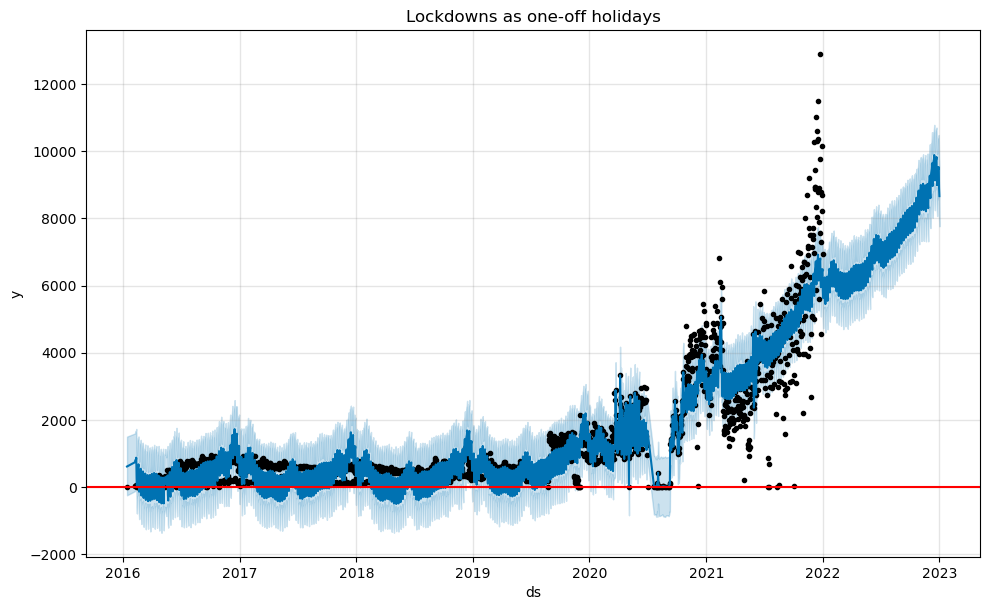

In [114]:
# You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.
m2.plot(forecast2)
plt.axhline(y=0, color='red')
plt.title('Lockdowns as one-off holidays');


In [289]:
############################## PREDICTION OBSERVATION ################################
# Overall trends are definitely up of traffic events for 2022 and later. 
# Clearly prediction is higher number of traffic events in 2022 and further.
# Did consider COVID 19 lockdowns as holidays when creating above prediction.
# We can clearly see that number of traffic events are predicted to increase 
# from ~4,000 to ~6,000 at the start 2022 when compared to start of 2021.
# Prediction is continuous increasing trend in 2022, with 2022 ending with 
# about 90 to 100,000 traffic events.
############################################################################

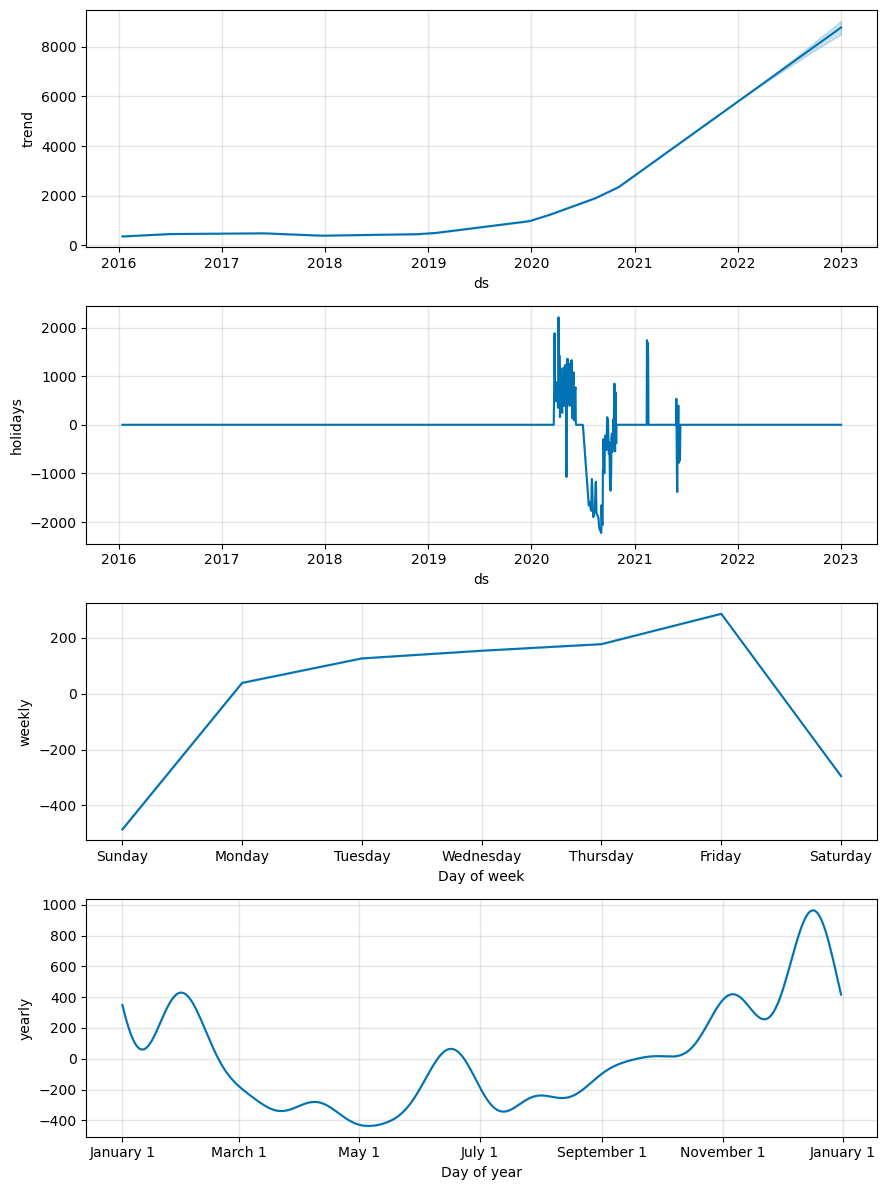

In [115]:
# If you want to see the forecast components, you can use the Prophet.plot_components method. 
# By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. 
# If you include holidays, you’ll see those here, too.
m2.plot_components(forecast2);


In [291]:
############################## SEASONALITY OBSERVATION ################################
# It's clear that we have seasonality in the data and it seems influenced by 
# national holidays and summer vacations. It seems we highest traffict events
# towards the end of the year starting from Thanksgiving going into New year.
# We can also traffic events spike during summer vacations showing that's 
# when people travel more.
# Take away will be to avoid travel during identified busy months / seasons.
#######################################################################################

# EDA SUMMARY

### Outcome :
This is a countrywide traffic accident dataset, which covers 49 states of the United States. Below are all EDA outcomes and observations.
1. Only 10-15% of all accidents in the US were high severity accidents.
2. More than 80% of the accidents impacted less than 1 mile and got cleared in less than 7 hrs.
3. 50% accident happened at temperature between 55 to 80 degree Fahrenheit.
4. More than 80% of accidents seems to have happened at windspeed <= 11 mph
5. Low to medium severity accidents have slightly higher probability of occurence during night time. And higher severity accidents have higher probability to occur in day time. Severity 4 accidents have almost 10% probability of happening in day time while only about 6% probability of them happening at the night time.
6. LOCATION Analysis - Accidents are concentrated in western and eastern US states. Minimal accident events were recorded in the central US. Top 10 states with highest number of accidents are CA, FL, TX, OR, VA, NY, PA, MN, NC, SC from highest to lowest respectively. Miami, Los Angeles, and Orlando are top 3 cities with accidents. 
7. In about 70% of accidents traffic cleared within 4 hrs. 80% rollovers were cleared within an hour.
8. TIME SERIES ANALYSIS - Prediction for year 2022 and 2023 shows increasing number of accidents by almost 40% between start of 2022 and start of 2023.
9. SEASONALITY - Accident data has seasonal trend and spikes during holidays (specially between Nov to Jan) and in summer vacations. 

### What is missing in the data?
I think info about types of car involved in the accidents, number of people involved, gender, student driver or not etc wil be very interesting
to look at as well.

### Were there any variables you felt could have helped in the analysis?
Some variables that are present but I did not look at them are binary variables showing details about surroundings of the accident i.e. presence of sppek breaker, signal etc.

### Were there any assumptions made you felt were incorrect?
Assumptions related to accidents during day time and night time needs more data.

### What challenges did you face, what did you not fully understand?
Regression analysis to predict severity of an accident by distance, temperature etc was not accurate. Model was not very accurate with low R-squared but individual independent variables showed statistically signifcant p-values.